# ĐỒ ÁN CUỐI KỲ 

Họ tên: Huỳnh Ngọc Quân

MSSV: 1712689

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Lấy dữ liệu

Dữ liệu trong đồ án cuối kỳ này bao gồm: 
- Dữ liệu về các unicorns trên thế giới tính tới thời 8/2020 được crawl [ở đây](https://www.cbinsights.com/research-unicorn-companies) ***CB-Insights_Global-Unicorns_2020.csv*** (source code crawl dữ liệu nằm ở file crawlUnicorns.ipynb)
- Dữ liệu các start up ở Ấn Độ trong các lĩnh vực và thông tin về các nhà đầu tư [ở đây](https://www.kaggle.com/sudalairajkumar/indian-startup-funding) ***startup_funding.csv***
- Dữ liệu các nhà đầu tư cho start up trên thế giới do unicorn-nest tổng hợp tính tới 4/1/2020 [ở đây](https://www.kaggle.com/iwanenko/unicorn-nest-startup-fundraising-dataset) ***funds.csv***

Chúng ta sẽ phân tích sự phân bố unicorns trên thế giới, các nhà đầu tư mạnh trong các lĩnh vực và xu hướng đầu tư hiện nay của thế giới. 

Sau đó ta sẽ phân tích dữ liệu các start up ở Ấn Độ để tìm ra được một vài kết luận thú vị.

# 1. Khám phá dữ liệu

## 1.1 Đọc dữ liệu từ file csv 

In [2]:
unicorns_df = pd.read_csv("CB-Insights_Global-Unicorns_2020.csv")
startup_df = pd.read_csv("startup_funding.csv")
investor_df = pd.read_csv("funds.csv")

## 1. 2 Tổng quan về dữ liệu

### 1.2.1 Dữ liệu unicorn

#### 1.2.1.1 Ý nghĩa dữ liệu

In [3]:
unicorns_df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),$140,4/7/2017,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,$56,12/31/2014,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,$46,12/1/2012,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,$36,1/23/2014,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,$20,5/5/2011,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


In [4]:
unicorns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 7 columns):
Unnamed: 0          472 non-null int64
Company             472 non-null object
Valuation ($B)      472 non-null object
Date Joined         472 non-null object
Country             472 non-null object
Industry            472 non-null object
Select Investors    471 non-null object
dtypes: int64(1), object(6)
memory usage: 25.9+ KB


In [5]:
unicorns_df.nunique()

Unnamed: 0          472
Company             472
Valuation ($B)      117
Date Joined         401
Country              30
Industry             16
Select Investors    469
dtype: int64

In [6]:
unicorns_df.shape

(472, 7)

In [7]:
print("NaN")
print(unicorns_df.isnull().sum())

NaN
Unnamed: 0          0
Company             0
Valuation ($B)      0
Date Joined         0
Country             0
Industry            0
Select Investors    1
dtype: int64


#### Ý nghĩa các cột dữ liệu:

- **Company**: Tên công ty (start up)
- **Valuation**: Định giá công ty (tỉ USD)
- **Date Joined**: Ngày được công nhận là unicorn
- **Country**: Quốc gia
- **Category**: Lĩnh vực công ty
- **Select Investors**: Các nhà đầu tư

**Tổng quan về các dòng và cột dữ liệu**

Dữ liệu gồm 449 dòng và 6 cột:
- Chỉ có 1 dòng dữ liệu có dữ liệu NaN ở cột Select Investors.
- Có 449 unicorns được ghi nhận tính tới thời 29/1/2020.
- Có 27 quốc gia có unicorns.
- Có 16 lĩnh vực được quan tâm và trở thành unicorns.
- Cả 6 cột đều có kiểu dữ liệu là object, nhưng ta nhận thấy ở cột thứ 2 kiểu dữ liệu nên là numerical, và cột thứ 3 là datetime. Ta sẽ tiền xử lý ở bước sau.

### 1.2.1.2 Tiền xử lý 

In [8]:
unicorns_df = unicorns_df.rename(columns = {'Unnamed: 0':'Rank'})
unicorns_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),$140,4/7/2017,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,$56,12/31/2014,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,$46,12/1/2012,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,$36,1/23/2014,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,$20,5/5/2011,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


**Cột Valuadation**

- Xóa ký tự \$ ở đầu và chuyển sang dạng numerical

In [9]:
unicorns_df = unicorns_df.replace('\$','', regex=True)
unicorns_df["Valuation ($B)"] = unicorns_df["Valuation ($B)"].astype(float)
unicorns_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),140.0,4/7/2017,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,56.0,12/31/2014,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,46.0,12/1/2012,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,36.0,1/23/2014,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,20.0,5/5/2011,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


**Cột Date Joined**

- Chuyển về dạng datetime 

In [10]:
unicorns_df['Date Joined'] =  pd.to_datetime(unicorns_df['Date Joined'])
unicorns_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


**Dữ liệu sau khi tiền xử lý**

In [11]:
unicorns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 7 columns):
Rank                472 non-null int64
Company             472 non-null object
Valuation ($B)      472 non-null float64
Date Joined         472 non-null datetime64[ns]
Country             472 non-null object
Industry            472 non-null object
Select Investors    471 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.9+ KB


In [12]:
unicorns_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


### 1.2.2 Dữ liệu startup ở Ấn Độ

#### 1.2.2.1 Ý nghĩa dữ liệu

In [13]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [14]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
Sr No                3044 non-null int64
Date dd/mm/yyyy      3044 non-null object
Startup Name         3044 non-null object
Industry Vertical    2873 non-null object
SubVertical          2108 non-null object
City  Location       2864 non-null object
Investors Name       3020 non-null object
InvestmentnType      3040 non-null object
Amount in USD        2084 non-null object
Remarks              419 non-null object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [15]:
startup_df.nunique()

Sr No                3044
Date dd/mm/yyyy      1035
Startup Name         2459
Industry Vertical     821
SubVertical          1942
City  Location        112
Investors Name       2412
InvestmentnType        55
Amount in USD         471
Remarks                72
dtype: int64

In [16]:
print("NaN")
print(startup_df.isnull().sum())

NaN
Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


In [17]:
startup_df.shape

(3044, 10)

In [18]:
startup_df = startup_df.drop('Remarks', axis = 1)

#### Ý nghĩa các cột dữ liệu:

- **Date**: Ngày nhận vốn đầu tư phát triển
- **Startup Name**: Tên công ty (start up)
- **Industry Vertical**: Lĩnh vực chính của công ty
- **SubVertical**: Lĩnh vực phụ của công ty
- **City Location**: Thành phố của trụ sở công ty
- **Investors Name**: Tên nhà đầu tư
- **InvestmentnType**: Loại hình đầu tư
- **Amount in USD**: Số tiền đầu tư (theo USD)

**Tổng quan về các dòng và cột dữ liệu**

Dữ liệu gồm 3044 dòng và 10 cột:
- Có tổng cộng 3044 start up ở Ấn Độ.
- Dữ liệu ở cột Remarks NaN khá nhiều nên ta drop cột này, cột ngày cũng không có ý nghĩa với mục đích phân tích hiện tại.
- Các cột thông tin chi tiết về start up đều bị thiếu khá nhiều.

#### 1.2.2.2 Tiền xử lý 

**Cột Date**
- Chuyển về dạng datetime

Tìm các ngày không hợp lệ trong cột Date dd/mm/yyyy và sửa lại thành các ngày hợp lệ.

Chuyển dữ liệu về kiểu datetime

In [19]:
# Lấy tất cả các giá trị cột Date dd/mm/yyyy
data = startup_df['Date dd/mm/yyyy'].values

# Đưa vào dataframe
df = pd.DataFrame({'Date': data})

# Thêm cột correct để đánh giá format đúng hay chưa
df['correct'] = pd.to_datetime(df['Date'],errors='coerce')

# Danh sách các giá trị không hợp lệ
errors = df.loc[df['correct'].isnull()]['Date'].unique().tolist()
errors

['05/072018', '01/07/015', '\\\\xc2\\\\xa010/7/2015', '22/01//2015']

In [20]:
startup_df['Date dd/mm/yyyy'].replace((['05/072018', '01/07/015','22/01//2015', '\\\\xc2\\\\xa010/7/2015']),
                         ('05/07/2018','01/07/2015','22/01/2015', '10/07/2015'), inplace=True)

In [21]:
startup_df['Date dd/mm/yyyy'] = pd.to_datetime(startup_df['Date dd/mm/yyyy'])

**Cột Amount in USD**
- Chuyển về dạng float

Khi chuyển dữ liệu sang float, ta lần lượt gặp các lỗi về giá trị, chúng ta sẽ lần lượt xử lý các giá trị này để đưa chung về một format:

- Các chuỗi bắt đầu bằng \\\\\\\\xc2\\\\\\\\xa0 + giá trị số, ta sẽ xóa đi \\\\\\\\xc2\\\\\\\\xa0.
- Một số giá trị có kiểu giá trị số + '+' VD: 123+ nghĩa là lớn hơn 123, ta xem như 123 là giá trị chuẩn.
- Các giá trị đặc biệt: undisclosed, unknown, Undisclosed, N/A chuyển thành NaN.

In [22]:
startup_df["Amount in USD"] = startup_df["Amount in USD"].apply(lambda x: str(str(x).replace(",","").replace("+", "")))

In [23]:
startup_df = startup_df.replace('\\\\\\\\xc2\\\\\\\\xa0','', regex=True)

In [24]:
startup_df['Amount in USD'].replace((['undisclosed', 'unknown','Undisclosed', 'N/A']),
                         ('NaN','NaN','NaN','NaN'), inplace=True)

In [25]:
startup_df["Amount in USD"] = startup_df["Amount in USD"].apply(lambda x: float(x))

**Dữ liệu sau khi tiền xử lý**

In [26]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
Sr No                3044 non-null int64
Date dd/mm/yyyy      3044 non-null datetime64[ns]
Startup Name         3044 non-null object
Industry Vertical    2873 non-null object
SubVertical          2108 non-null object
City  Location       2864 non-null object
Investors Name       3020 non-null object
InvestmentnType      3040 non-null object
Amount in USD        2073 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 214.2+ KB


In [27]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


### 1.2.3 Dữ liệu các nhà đầu tư

In [28]:
investor_df.head()

,Fund name,Unicorn Nest website link,Fund website,Fund LinkedIn,Fund Crunchbase,Email format for website,Fund structure,Country,Coincidence of the geography of the fund and its TOP1 invest geofocus,Some of TOP industries,...,Exits,Unicorn amount,Average rounds per year,Average round size,Average startup valuation,Decision makers / strategy diversity index,Average multiplicator,Success / strategy diversity index,Follow-on index,Readiness to take younger startups
0,212,https://unicorn-nest.com/funds/212/,NaN,NaN,https://www.crunchbase.com/organization/212-ca...,NaN,VC,Turkey,1.0,"Energy Storage, Semiconductor",...,TOP5000,NaN,TOP5000,TOP30000,NaN,NaN,TOP10000,NaN,TOP5000,TOP10000
1,415,https://unicorn-nest.com/funds/415/,https://415.com,NaN,https://www.crunchbase.com/organization/415,NaN,VC,United States,1.0,"Software, Hardware",...,NaN,NaN,TOP5000,TOP20000,NaN,NaN,NaN,NaN,TOP10000,TOP10000
2,2020,https://unicorn-nest.com/funds/2020/,NaN,NaN,https://www.crunchbase.com/organization/2020,NaN,VC,NaN,NaN,"Travel, Internet",...,NaN,NaN,TOP30000,TOP10000,NaN,NaN,NaN,NaN,NaN,TOP20000
3,21212,https://unicorn-nest.com/funds/21212/,https://21212.com,https://www.linkedin.com/company/21212-digital...,https://www.crunchbase.com/organization/21212,Domain name: 21212.com; User name format in de...,VC,Brazil,0.0,"Analytics, E-Commerce",...,NaN,NaN,TOP10000,TOP30000,TOP10000,NaN,NaN,NaN,NaN,TOP20000
4,.406 Ventures,https://unicorn-nest.com/funds/406-ventures/,https://406ventures.com,NaN,https://www.crunchbase.com/organization/406-ve...,Domain name: 406ventures.com; User name format...,VC,United States,1.0,"Real Time, Product Design",...,TOP5000,TOP1000,TOP500,TOP10000,TOP5000,TOP1000,TOP5000,TOP5000,TOP5000,TOP20000


In [29]:
investor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26589 entries, 0 to 26588
Data columns (total 28 columns):
Fund name                                                                26589 non-null object
Unicorn Nest website link                                                26589 non-null object
Fund website                                                             12759 non-null object
Fund LinkedIn                                                            6076 non-null object
Fund Crunchbase                                                          26589 non-null object
Email format for website                                                 19677 non-null object
Fund structure                                                           25012 non-null object
Country                                                                  20912 non-null object
Coincidence of the geography of the fund and its TOP1 invest geofocus    20742 non-null float64
Some of TOP industries              

In [30]:
investor_df = investor_df.drop(['Unicorn Nest website link', 'Fund website', 'Fund LinkedIn', 
                                'Fund Crunchbase', 'Email format for website', 'Coincidence of the geography of the fund and its TOP1 invest geofocus',
                                'Fund that most often invests in previous rounds',
                                'Fund that most often invests together', 'Fund that most often invests in following rounds',
                                'Fund novelty', 'Proximity to the year of peak activity', 'Amount of Key Persons', 
                                'Lead investments', 'Exits', 'Average rounds per year', 
                                'Average round size', 'Average startup valuation', 'Decision makers / strategy diversity index',
                                'Average multiplicator', 'Follow-on index', 'Readiness to take younger startups'
                               ], axis = 1)
investor_df.head()

,Fund name,Fund structure,Country,Some of TOP industries,One of the most outstanding startups,Unicorn amount,Success / strategy diversity index
0,212,VC,Turkey,"Energy Storage, Semiconductor",Cymbet,NaN,NaN
1,415,VC,United States,"Software, Hardware",Rimac Automobili,NaN,NaN
2,2020,VC,NaN,"Travel, Internet",Delivery Hero,NaN,NaN
3,21212,VC,Brazil,"Analytics, E-Commerce",Sellpoints,NaN,NaN
4,.406 Ventures,VC,United States,"Real Time, Product Design",SmartPoint,TOP1000,TOP5000


In [31]:
investor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26589 entries, 0 to 26588
Data columns (total 7 columns):
Fund name                               26589 non-null object
Fund structure                          25012 non-null object
Country                                 20912 non-null object
Some of TOP industries                  26405 non-null object
One of the most outstanding startups    26253 non-null object
Unicorn amount                          3053 non-null object
Success / strategy diversity index      7481 non-null object
dtypes: object(7)
memory usage: 1.4+ MB


In [32]:
investor_df.nunique()

Fund name                               26589
Fund structure                              2
Country                                   113
Some of TOP industries                  12518
One of the most outstanding startups    14567
Unicorn amount                              4
Success / strategy diversity index          5
dtype: int64

In [33]:
print("NaN")
print(investor_df.isnull().sum())

NaN
Fund name                                   0
Fund structure                           1577
Country                                  5677
Some of TOP industries                    184
One of the most outstanding startups      336
Unicorn amount                          23536
Success / strategy diversity index      19108
dtype: int64


In [34]:
investor_df.shape

(26589, 7)

#### Xóa các cột dữ liệu không cần thiết
Dữ liệu có 28 cột, ta xóa bớt các cột thông tin về các nhà đầu tư như:

- Unicorn Nest website link
- Fund website
- Fund LinkedIn
- Fund Crunchbase

...

Và chỉ lấy các cột có thông tin phân tích đối với 2 tập dữ liệu còn lại.

#### Ý nghĩa các cột dữ liệu:

- **Fund name**: Tên nhà đầu tư
- **Fund structure**: Phân biệt giữa 2 cấu trúc quỹ đầu tư mạo hiểm, và quỹ đầu tư mạo hiểm doanh nghiệp
- **Country**: Quốc gia
- **Some of TOP industries**: Các lĩnh vực đầu tư
- **One of the most outstanding startups**: Các start up nổi bật
- **Unicorn amount**: Số lượng Unicorn
- **Sucess / strategy diversity index**: Mức độ thành công

**Tổng quan về các dòng và cột dữ liệu**

Dữ liệu gồm 26589 dòng và 7 cột:
- Có 26589 nhà đầu tư được tổng hợp trong dữ liệu này.
- Có 2 loại cấu trúc quỹ đầu tư: đầu tư mạo hiểm và đầu tư mạo hiểm doanh nghiệp

# 2. Khám phá dữ liệu

## 2.1 Quan sát lại dữ liệu

In [35]:
unicorns_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


In [36]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [37]:
investor_df.head()

,Fund name,Fund structure,Country,Some of TOP industries,One of the most outstanding startups,Unicorn amount,Success / strategy diversity index
0,212,VC,Turkey,"Energy Storage, Semiconductor",Cymbet,NaN,NaN
1,415,VC,United States,"Software, Hardware",Rimac Automobili,NaN,NaN
2,2020,VC,NaN,"Travel, Internet",Delivery Hero,NaN,NaN
3,21212,VC,Brazil,"Analytics, E-Commerce",Sellpoints,NaN,NaN
4,.406 Ventures,VC,United States,"Real Time, Product Design",SmartPoint,TOP1000,TOP5000


## 2.2 Tiền xử lý dữ liệu

**Cột Select Investors ở dữ liệu unicorns**
- Cột này có thể gồm nhiều công ty, chúng ta sẽ thêm các cột mới: Investor_1, Investor_2... để dễ phân tích dữ liệu hơn.

**Xử lý các dòng dữ liệu không thống nhất định dạng**

Trong quá trình phần tích dữ liệu, ta nhận thấy dữ liệu cột này không thống nhất dẫn đến một số sai sót:
- Ta nhận thấy có 1 dòng thay vì dấu ',' họ đã ghi dấu '.'.
- Một số công ty như SoftBank họ cũng viết Softbank. Nên để thống nhất, ta chuyển tất cả về dạng in hoa.
- Một số dòng dữ liệu viết liền là 'SoftBankGroup'
- Thay vì dùng ',' thì họ lại dùng 'and'

In [38]:
unicorns_df.iloc[406]

Rank                                                          406
Company                                                     Loggi
Valuation ($B)                                                  1
Date Joined                                   2019-06-05 00:00:00
Country                                                    Brazil
Industry                      Supply chain, logistics, & delivery
Select Investors    Qualcomm Ventures, SoftBank Group. Monashees+
Name: 406, dtype: object

In [39]:
unicorns_df.iloc[1]

Rank                                                                1
Company                                                Didi Chuxing  
Valuation ($B)                                                     56
Date Joined                                       2014-12-31 00:00:00
Country                                                         China
Industry                                        Auto & transportation
Select Investors    Matrix Partners, Tiger  Global Management, Sof...
Name: 1, dtype: object

In [40]:
unicorns_df.loc[unicorns_df['Rank'] == 406, 'Select Investors'] = 'Qualcomm Ventures, SoftBank Group, Monashees+'

In [41]:
unicorns_df.loc[unicorns_df['Rank'] == 1, 'Select Investors'] = 'Matrix Partners, Tiger  Global Management, Sofbank Corp.'

In [42]:
unicorns_df = unicorns_df.replace(' and ','', regex=True)

In [43]:
unicorns_df[unicorns_df['Select Investors'].str.contains("SoftBankGroup", na=False)]

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
27,27,Roivant Sciences,9.09,2018-11-13,United States,Health,"SoftBankGroup, Founders Fund"
34,34,Snapdeal,7.00,2014-05-21,India,E-commerce & direct-to-consumer,"SoftBankGroup, Blackrock, Alibaba Group"
35,35,Tokopedia,7.00,2018-12-12,Indonesia,E-commerce & direct-to-consumer,"SoftBankGroup, Alibaba Group, Sequoia Capital ..."


In [44]:
unicorns_df = unicorns_df.replace('SoftBankGroup','Softbank Group', regex=True)

In [45]:
df = pd.concat([unicorns_df['Select Investors'].str.split(',', expand=True)], axis=1)
unicorns_df = unicorns_df.join(df)
unicorns_df = unicorns_df.rename(columns = {0:'Investor_1', 1: 'Investor_2', 2: 'Investor_3', 3: 'Investor_4'})
unicorns_df['Investor_1'] = unicorns_df['Investor_1'].str.strip()
unicorns_df['Investor_2'] = unicorns_df['Investor_2'].str.strip()
unicorns_df['Investor_3'] = unicorns_df['Investor_3'].str.strip()
unicorns_df['Investor_4'] = unicorns_df['Investor_4'].str.strip()

unicorns_df['Investor_1'] = unicorns_df['Investor_1'].str.upper()
unicorns_df['Investor_2'] = unicorns_df['Investor_2'].str.upper()
unicorns_df['Investor_3'] = unicorns_df['Investor_3'].str.upper()
unicorns_df['Investor_4'] = unicorns_df['Investor_4'].str.upper()
unicorns_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof...",MATRIX PARTNERS,TIGER GLOBAL MANAGEMENT,SOFBANK CORP.,None
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe...",FOUNDERS FUND,DRAPER FISHER JURVETSON,ROTHENBERG VENTURES,None
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel",RRE VENTURES,FOUNDERS FUND,IN-Q-TEL,None


**Cột Some of TOP industries ở dữ liệu investor**
- Cột này tương tự cũng có nhiều ngành công nghiệp được phân nhau bằng dấu ',' ta sẽ tách ra và thêm vào các cột mới để dễ phân tích dữ hiệu hơn.

In [46]:
df = pd.concat([investor_df['Some of TOP industries'].str.split(',', expand=True)], axis=1)
investor_df = investor_df.join(df)
investor_df = investor_df.rename(columns = {0:'Industry_1', 1: 'Industry_2'})
investor_df.head()

,Fund name,Fund structure,Country,Some of TOP industries,One of the most outstanding startups,Unicorn amount,Success / strategy diversity index,Industry_1,Industry_2
0,212,VC,Turkey,"Energy Storage, Semiconductor",Cymbet,NaN,NaN,Energy Storage,Semiconductor
1,415,VC,United States,"Software, Hardware",Rimac Automobili,NaN,NaN,Software,Hardware
2,2020,VC,NaN,"Travel, Internet",Delivery Hero,NaN,NaN,Travel,Internet
3,21212,VC,Brazil,"Analytics, E-Commerce",Sellpoints,NaN,NaN,Analytics,E-Commerce
4,.406 Ventures,VC,United States,"Real Time, Product Design",SmartPoint,TOP1000,TOP5000,Real Time,Product Design


## 2.3 Đặt vấn đề và trả lời các câu hỏi 

Sau khi có được cái nhìn tổng quan về 3 tập dữ liệu, ta sẽ đặt một số vấn đề để có thể khám phá ra được những điều thú vị:

**Dữ liệu unicorns**
- Phân bố số lượng unicorns ở các quốc gia, quốc gia nào có nhiều unicorns nhất.
- Lĩnh vực nào có số lượng unicorns nhiều nhất, giải thích xu hướng đó trong tình hình thế giới hiện nay. Sắp xếp theo giá trị công ty, top 5 lĩnh vực nào có giá trị lớn nhất hiện nay?
- Phân phối giá trị của các unicorns như thế nào.
- Nhà đầu tư nào sở hữu nhiều unicorns nhất trên thế giới.
- Số lượng unicorns xuất hiện theo từng năm. Năm nào là sự bùng nổ?
- Thống kê unicorns ở Đông Nam Á

**Dữ liệu start up ở Ấn Độ**
- Các lĩnh vực có nhiều start up nhất ở Ấn Độ có đi theo xu hướng của các unicorns trên thế giới hay không?
- Phân phối lượng tiền được đầu tư ở Ấn Độ.
- Dữ liệu thời gian: số tiền đầu tư phân bố thế nào theo thời gian.
- Các start up nhận được nhiều vòng đầu tư nhất ở Ấn Độ.

Sau khi trả lời được các câu hỏi ở trên, ta có thể lập kế hoạch cho một start up và đánh giá được mức độ khả quan của start up đó:

- Lĩnh vực nào có tính cạnh tranh cao nhất hiện nay? Lĩnh vực nào có tính cạnh tranh còn thấp? Điều đó ảnh hưởng như thế nào tới việc lựa chọn lĩnh vực để thành lập start up dựa trên các tiêu chí: vốn đầu tư, ý tưởng, xu hướng?

### 2.3.1 Dữ liệu unicorns

**Dữ liệu unicorns**
- Phân bố số lượng unicorns ở các quốc gia, quốc gia nào có nhiều unicorns nhất.
- Lĩnh vực nào có số lượng unicorns nhiều nhất, giải thích xu hướng đó trong tình hình thế giới hiện nay. Sắp xếp theo giá trị công ty, top 5 lĩnh vực nào có giá trị lớn nhất hiện nay?
- Phân phối giá trị của các unicorns như thế nào.
- Nhà đầu tư nào sở hữu nhiều unicorns nhất trên thế giới.
- Số lượng unicorns xuất hiện theo từng năm. Năm nào là sự bùng nổ?

### Phân bố số lượng unicorns ở các quốc gia, quốc gia nào có nhiều unicorns nhất?

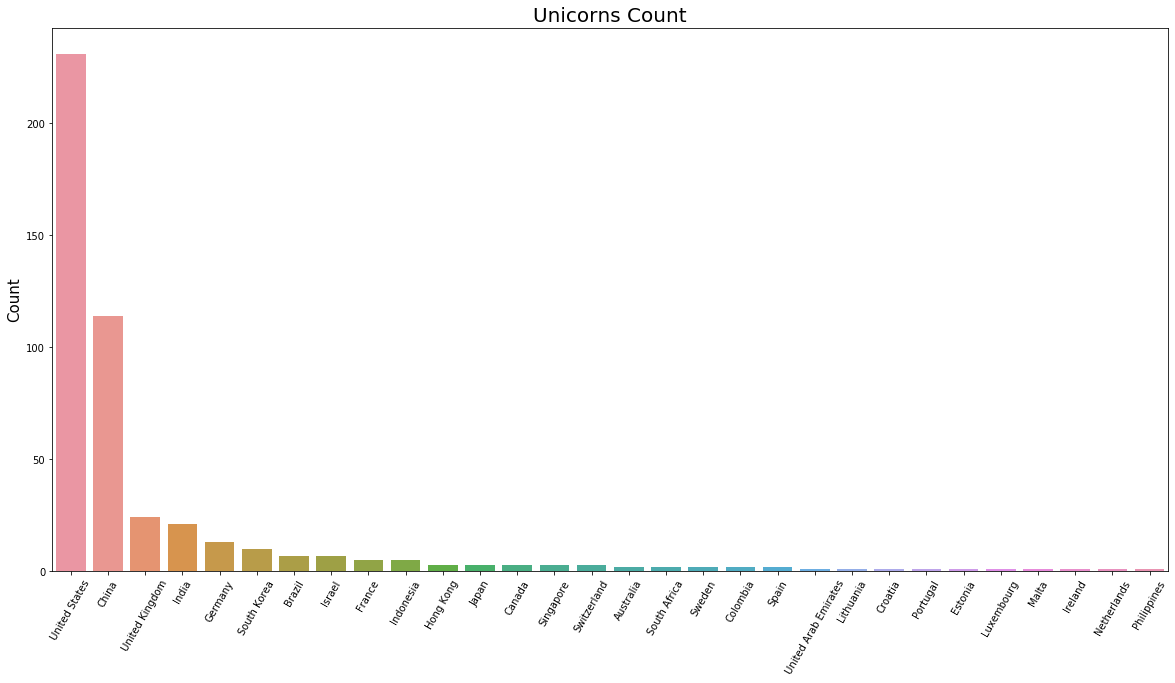

In [47]:
country_unicorns = unicorns_df['Country'].value_counts()

plt.figure(figsize = (20,10))

g = sns.barplot(x=country_unicorns.index ,y=country_unicorns.values)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_title("Unicorns Count", fontsize=20)
g.set_ylabel("Count", fontsize=15)

plt.show()

Theo biểu đồ trên ta nhận thấy: 
- Mỹ là quốc gia sở hữu nhiều unicorns nhất trên thế giới, gấp đôi cả Trung Quốc ở vị trí thứ 2.
- Kế tiếp là Vương Quốc Anh và Ấn Độ.
- Trong các năm vừa qua, Ấn Độ được mệnh danh là cường quốc CNTT nhưng so với Mỹ và Trung Quốc vẫn còn thua khá xa. Tuy nhiên so với các nước ở châu Âu thì Ấn Độ đã vượt mặt. 
- Đài Loan (Taiwan) được xem là nước có nhiều nhân tài CNTT và CNTT phát triển nhưng sao không xuất hiện ở biểu đồ này nhỉ?

Các quốc gia ở Đông Nam Á:
- 3 quốc gia Đông Nam Á xuất hiện ở đây là: Indonesia, Singapore và Philippines. Đáng tiếc là Việt Nam chưa xuất hiện unicorn tỉ đô nào.

### Lĩnh vực nào có số lượng unicorns nhiều nhất, giải thích xu hướng đó trong tình hình thế giới hiện nay. Sắp xếp theo giá trị công ty, top 5 lĩnh vực nào có giá trị lớn nhất hiện nay?

- Liệt kê ra top 5 lĩnh vực công nghiệp có nhiều unicorns nhất.
- Các ông lớn trong top 5 lĩnh vực này là unicorn nào nhỉ? 
- Sắp xếp theo giá trị công ty, top 10 lĩnh vực mà công ty có giá trị lớn nhất hiện nay.

In [48]:
category_unicorns = unicorns_df['Industry'].value_counts()
category_unicorns[:5]

Fintech                            62
Internet software & services       58
E-commerce & direct-to-consumer    55
Artificial intelligence            46
Health                             35
Name: Industry, dtype: int64

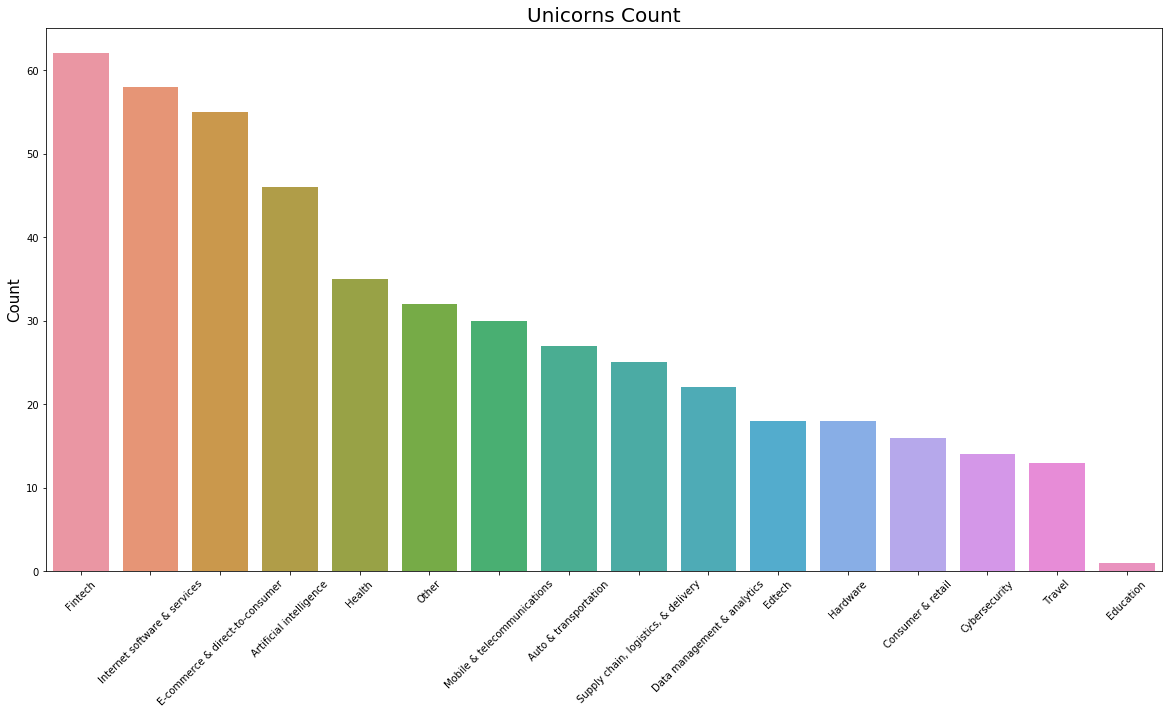

In [49]:
plt.figure(figsize = (20,10))

g = sns.barplot(x=category_unicorns.index ,y=category_unicorns.values)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Unicorns Count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

**Top 5 lĩnh vực có nhiều unicorns nhất là:**
- Fintech: công nghệ tài chính, có thể kể đến là các dịch vụ mobile banking, cryptocurrency, investment, borrowing. Các lĩnh vực trong quản lý tài chính, ngân hàng.                   
- Internet software & services: dịch vụ và phần mềm Internet      
- E-commerce & direct-to-consumer: thương mại điện tử  
- Artificial intelligence: trí tuệ nhân tạo       
- Health: sức khỏe

Và đây là xu hướng của thế giới, công nghiệp 4.0, tất cả đều là các unicorns về công nghệ. Chúng ta thử khám phá các ông lớn trong các lĩnh vực này là ai nhé!

In [50]:
unicorns_df[unicorns_df['Industry'] == 'Fintech'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None
8,8,One97 Communications,16.0,2015-05-12,India,Fintech,"Intel Capital, Sapphire Ventures, Alibaba Group",INTEL CAPITAL,SAPPHIRE VENTURES,ALIBABA GROUP,None
19,19,Robinhood,11.2,2017-04-26,United States,Fintech,"Google Ventures, Andreessen Horowitz, DST Global",GOOGLE VENTURES,ANDREESSEN HOROWITZ,DST GLOBAL,None
24,24,Nubank,10.0,2018-03-01,Brazil,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",SEQUOIA CAPITAL,REDPOINT E.VENTURES,KASZEK VENTURES,None
26,26,Ripple,10.0,2019-12-20,United States,Fintech,"IDG Capital, Venture51, Lightspeed Venture Par...",IDG CAPITAL,VENTURE51,LIGHTSPEED VENTURE PARTNERS,None


**Nhận xét**

- Mỹ chiếm 3/5 start up thành công nhất trong lĩnh vực FinTech. Cái tên Stripe có vẻ lạ lẫm, sau khi tìm hiểu thì đây là một ứng dụng thanh toán online được ưa chuộng ở Mỹ, châu Âu, châu Úc và Ấn Độ, được liên kết với nhiều website. 

- Start up này đạt giá trị tỉ đô vào đầu năm 2014. Trong thời gian này, ứng dụng thanh toán online ở Việt Nam vẫn còn chưa phổ biến, phải đến năm 2017 mới bắt đầu bùng nổ. Có lẽ đây là động lực cho các start up ở Việt Nam về sự phát triển của ví điện tử.

- Đứng vị trí thứ 2 là cái tên của một nước châu Á: Ấn Độ

In [51]:
unicorns_df[unicorns_df['Industry'] == 'Internet software & services'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
46,46,Canva,6.0,2018-01-08,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",SEQUOIA CAPITAL CHINA,BLACKBIRD VENTURES,MATRIX PARTNERS,None
51,51,Vice Media,5.7,2013-08-17,United States,Internet software & services,"Technology Crossover Ventures, A&E Television ...",TECHNOLOGY CROSSOVER VENTURES,A&E TELEVISION NETWORKS,None,None
56,56,HashiCorp,5.1,2018-11-01,United States,Internet software & services,"Redpoint Ventures, True Ventures, Mayfield Fund",REDPOINT VENTURES,TRUE VENTURES,MAYFIELD FUND,None
72,72,Roblox,4.0,2018-09-04,United States,Internet software & services,"Atlos Ventures, Index Ventures, First Round Ca...",ATLOS VENTURES,INDEX VENTURES,FIRST ROUND CAPITAL,None
86,86,Freshworks,3.5,2018-07-31,United States,Internet software & services,"Accel, Tiger Global Management, capitalG",ACCEL,TIGER GLOBAL MANAGEMENT,CAPITALG,None


**Nhận xét**
- Canva, Discord là 2 cái tên quen thuộc chúng ta đã biết. 
- Vice Media là một nền tảng truyền thông, sản xuất nội dung truyền hình.
- HashiCorp là một nền tảng công nghệ, công ty open-sources quản lý datacenter, các sản phẩm về cloud, có hợp tác với 3 cái tên đứng đầu thế giới hiện nay: Microsoft Azuere, AWS và Google Cloud. Một thông tin thú vị!
- Roblox là nền tảng game online.

In [52]:
unicorns_df[unicorns_df['Industry'] == 'E-commerce & direct-to-consumer'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
11,11,SHEIN,15.0,2018-07-03,China,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",TIGER GLOBAL MANAGEMENT,SEQUOIA CAPITAL CHINA,SHUNWEI CAPITAL PARTNERS,None
18,18,Wish,11.2,2015-05-18,United States,E-commerce & direct-to-consumer,"Founders Fund, GGV Capital, Digital Sky Techno...",FOUNDERS FUND,GGV CAPITAL,DIGITAL SKY TECHNOLOGIES,None
29,29,Coupang,9.0,2014-05-28,South Korea,E-commerce & direct-to-consumer,"Sequoia Capital, Founder Collective, Wellingt...",SEQUOIA CAPITAL,FOUNDER COLLECTIVE,WELLINGTON MANAGEMENT,None
30,30,Guazi (Chehaoduo),9.0,2016-03-12,China,E-commerce & direct-to-consumer,"Sequoia Capital China, GX Capital",SEQUOIA CAPITAL CHINA,GX CAPITAL,None,None
34,34,Snapdeal,7.0,2014-05-21,India,E-commerce & direct-to-consumer,"Softbank Group, Blackrock, Alibaba Group",SOFTBANK GROUP,BLACKROCK,ALIBABA GROUP,None


**Nhận xét**
- Có vẻ như các thị trường tỉ dân là cơ hội để phát triển thương mại điện tử này: Trung Quốc (1.393 tỉ), Ấn Độ (1.353)
- Lĩnh vực thương mại điện tử ở Đông Nam Á hiện nay lớn nhất có thể kể đến 2 cái tên: Shopee (Sea Group) và Lazada, nhưng nó vẫn chưa được đánh giá là unicorn tỉ đô. Chúng ta sẽ xem xét về các unicorn ở Đông Nam Á ở phần sau.

In [53]:
unicorns_df[unicorns_df['Industry'] == 'Artificial intelligence'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,0,Toutiao (Bytedance),140.00,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP
22,22,UiPath,10.20,2018-03-02,United States,Artificial intelligence,"Accel, capitalG, Earlybrid Venture Capital, Se...",ACCEL,CAPITALG,EARLYBRID VENTURE CAPITAL,SEEDCAMP
33,33,SenseTime,7.50,2017-07-11,China,Artificial intelligence,"Star VC, IDG Capital, Infore Capital, Alibaba ...",STAR VC,IDG CAPITAL,INFORE CAPITAL,ALIBABA GROUP
36,36,Argo AI,7.25,2019-07-12,United States,Artificial intelligence,"Volkswagen Group, Ford Autonomous Vehicles",VOLKSWAGEN GROUP,FORD AUTONOMOUS VEHICLES,None,None
37,37,Automation Anywhere,6.80,2018-07-02,United States,Artificial intelligence,"General Atlantic, Goldman Sachs, New Enterpris...",GENERAL ATLANTIC,GOLDMAN SACHS,NEW ENTERPRISE ASSOCIATES,None


**Nhận xét**
- Top 1 là công ty ByteDance có định giá công ty chênh lệch quá cao so với các công ty còn lại. Đây là start up về AI tính tới thời điểm hiện tại. Đây chính là công ty mẹ của Tiktok, ứng dụng đình đám hiện nay. Ta sẽ nhận xét thêm ở phần sau.
- Argo AI là một start up về xe tự hành.
- UIPath, Automation Anywhere là các start up về lĩnh vực robotics, ứng dụng doanh nghiệp, studio. 
- SenseTime là start up ứng dụng AI vào các lĩnh vực bussiness, smart city, Healthcare, Automobile. Đây là một start up tiềm năng.

In [54]:
unicorns_df[unicorns_df['Industry'] == 'Health'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
17,17,Samumed,12.00,2018-08-06,United States,Health,"Vickers Venture Partners, IKEA GreenTech",VICKERS VENTURE PARTNERS,IKEA GREENTECH,None,None
27,27,Roivant Sciences,9.09,2018-11-13,United States,Health,"Softbank Group, Founders Fund",SOFTBANK GROUP,FOUNDERS FUND,None,None
53,53,GuaHao (We Doctor),5.50,2015-09-22,China,Health,"Tencent, Morningside Group",TENCENT,MORNINGSIDE GROUP,None,None
57,57,United Imaging Healthcare,5.00,2017-09-14,China,Health,"China Life Insurance, China Development Bank C...",CHINA LIFE INSURANCE,CHINA DEVELOPMENT BANK CAPITAL,CITIC SECURITIES INTERNATIONAL,None
61,61,Tempus,5.00,2018-03-21,United States,Health,"New Enterprise Associates, T. Rowe Associates,...",NEW ENTERPRISE ASSOCIATES,T. ROWE ASSOCIATES,LIGHTBANK,None


**Nhận xét**
- Lĩnh vực sức khỏe Mỹ và Trung Quốc đang là những quốc gia đi đầu.

#### Top 10 start up có giá trị lớn nhất hiện nay

In [55]:
unicorns_df.sort_values(by='Valuation ($B)', ascending=False).head(10)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof...",MATRIX PARTNERS,TIGER GLOBAL MANAGEMENT,SOFBANK CORP.,None
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe...",FOUNDERS FUND,DRAPER FISHER JURVETSON,ROTHENBERG VENTURES,None
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel",RRE VENTURES,FOUNDERS FUND,IN-Q-TEL,None
5,5,Airbnb,18.0,2011-07-26,United States,Travel,"General Catalyst Partners, Andreessen Horowit...",GENERAL CATALYST PARTNERS,ANDREESSEN HOROWITZ,ENIAC VENTURES,None
6,6,Kuaishou,18.0,2015-01-01,China,Mobile & telecommunications,"Morningside Venture Capital, Sequoia Capital, ...",MORNINGSIDE VENTURE CAPITAL,SEQUOIA CAPITAL,BAIDU,None
7,7,Epic Games,17.3,2018-10-26,United States,Other,"Tencent Holdings, KKR, Smash Ventures",TENCENT HOLDINGS,KKR,SMASH VENTURES,None
8,8,One97 Communications,16.0,2015-05-12,India,Fintech,"Intel Capital, Sapphire Ventures, Alibaba Group",INTEL CAPITAL,SAPPHIRE VENTURES,ALIBABA GROUP,None
9,9,DoorDash,16.0,2018-03-01,United States,"Supply chain, logistics, & delivery","Softbank Group, Sequoia Capital, Khosla Ventures",SOFTBANK GROUP,SEQUOIA CAPITAL,KHOSLA VENTURES,None


**Nhận xét**
- Trung Quốc chiếm lấy vị trí thứ 1 và 2 trong 2 lĩnh vực AI và nền tảng vận chuyển công nghệ.
- Cái tên ByteDance (chủ sở hữu Tiktok) được định giá cao gấp 2.5 lần so với vị trí thứ 2. Đây là start up có tham vọng vượt mặt các nền tảng mạng xã hội khác. 
- Tiktok vừa bị cấm tại thị trường tỉ dân là Ấn Độ và có nguy cơ bị cấm luôn tại Mỹ. Dữ liệu này được thu thập tính tới thời điểm 1/8/2020. Ta sẽ quan sát xem định giá công ty có nguy cơ bị giảm hay không sau một thời gian nữa.
- Didi Chuxing, nền tảng vận chuyển công nghệ đạt được 56 tỉ đô ở Trung Quốc không có gì lạ vì đây là một thị trường tỉ dân và với nhưng ưu thế chính trị, Didi Chuxing dễ dàng đẩy Uber ra khỏi cuộc chơi. 
- SpaceX, một start up đình đám về lĩnh vực không gian của Elon Musk. 
- Ấn Độ xuất sắc khi có mặt trong top 10 này với start up One97 Communications, nền tảng các ứng dụng Internet. Ưu thế của Ấn Độ là thị trường tỉ dân.
- Nhìn lướt qua các cột Investor, ta nhận thấy cái tên Softbank xuất hiện khá là nhiều ở top 10 này. Ta sẽ tìm hiểu về các nhà đầu tư ở phần sau.

### Phân phối giá trị của các unicorns như thế nào.

**Tiền xử lý** 

Chúng ta tạo một feature mới là ln của Valuation để có cái nhìn trực quan hơn về phân phối giá trị của các unicorns.

In [56]:
unicorns_df['Valuation ($B) log'] = np.log(unicorns_df['Valuation ($B)'] + 1)
unicorns_df[['Valuation ($B)', 'Valuation ($B) log']].head()

,Valuation ($B),Valuation ($B) log
0,140.0,4.948760
1,56.0,4.043051
2,46.0,3.850148
3,36.0,3.610918
4,20.0,3.044522


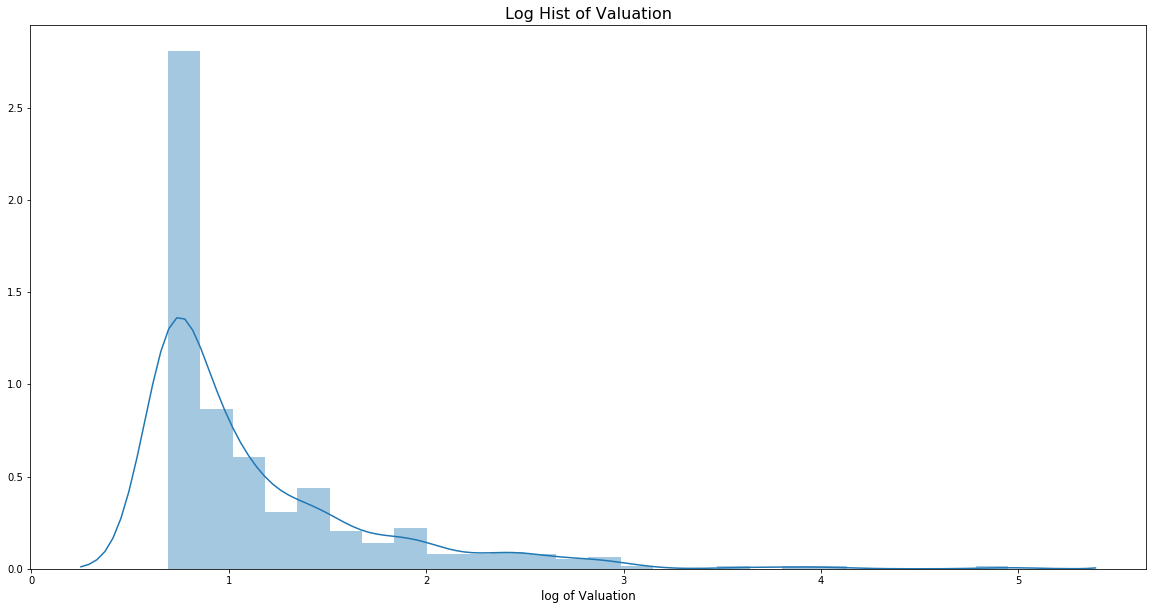

In [57]:
plt.figure(figsize=(20,10))
sns.distplot(unicorns_df['Valuation ($B) log'])
plt.xlabel('log of Valuation', fontsize=12)
plt.title("Log Hist of Valuation", fontsize=16)
plt.show()

**Nhận xét**
- Số lượng unicorn tỉ lệ nghịch với giá trị của unicorn tức là hầu hết các unicorn đều chủ yếu phân bố ở cùng một mức thấp.
- Chỉ một số unicorn được định giá ở mức vượt trội so với phần còn lại.

### Nhà đầu tư nào sở hữu nhiều unicorns nhất trên thế giới.

**Tiền xử lý**
- Dữ liệu nhà đầu tư ở cột "Select Investor" là một chuỗi các nhà đầu tư được phân cách với nhau bằng dấu "," gây khó khăn để xử lý. Chúng ta cần phân tách ra và thêm vào các cột mới.
- Bước tiền xử lý này các bạn có thể xem code ở phần 1 mình đã làm "Dữ liệu unicorns -> tiền xử lý -> cột "Select investor""

**Các bước trả lời câu hỏi**
- Chúng ta phải đếm số lượng các nhà đầu (giá trị phân biệt) ở cả 4 cột nên ta sẽ gom dữ liệu 4 cột này lại thành 1 Series và đếm nó.

In [58]:
investor_unicorns = unicorns_df[['Investor_1', 'Investor_2', 'Investor_3', 'Investor_4']]
count = pd.Series(investor_unicorns.squeeze().values.ravel()).value_counts()
count = count[count.values >= 10]
count

SEQUOIA CAPITAL CHINA               28
SOFTBANK GROUP                      26
SEQUOIA CAPITAL                     25
TENCENT HOLDINGS                    21
NEW ENTERPRISE ASSOCIATES           18
ANDREESSEN HOROWITZ                 18
TIGER GLOBAL MANAGEMENT             16
GOLDMAN SACHS                       16
IDG CAPITAL                         15
GOOGLE VENTURES                     15
KHOSLA VENTURES                     14
GENERAL ATLANTIC                    14
ACCEL                               13
ALIBABA GROUP                       12
GREYLOCK PARTNERS                   12
BESSEMER VENTURE PARTNERS           12
LIGHTSPEED VENTURE PARTNERS         11
GGV CAPITAL                         10
DST GLOBAL                          10
BATTERY VENTURES                    10
KKR                                 10
INDEX VENTURES                      10
KLEINER PERKINS CAUFIELD & BYERS    10
dtype: int64

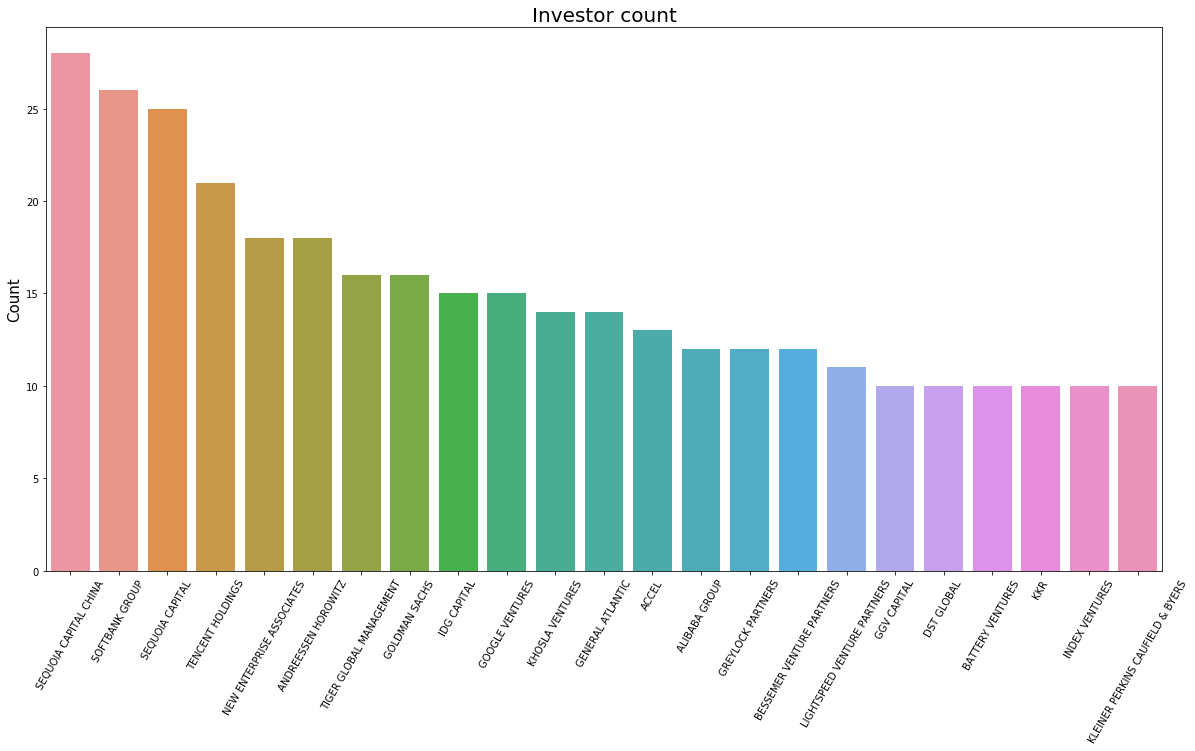

In [59]:
plt.figure(figsize = (20,10))

g = sns.barplot(x=count.index ,y=count.values)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_title("Investor count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

In [60]:
investor_top10_unicorns = unicorns_df[['Investor_1', 'Investor_2', 'Investor_3', 'Investor_4']].head(10)
count = pd.Series(investor_top10_unicorns.squeeze().values.ravel()).value_counts()
count

SEQUOIA CAPITAL                2
KHOSLA VENTURES                2
SOFTBANK GROUP                 2
MORNINGSIDE VENTURE CAPITAL    1
SEQUOIA CAPITAL CHINA          1
FOUNDERS FUND                  1
TIGER  GLOBAL MANAGEMENT       1
ENIAC VENTURES                 1
KKR                            1
ANDREESSEN HOROWITZ            1
MATRIX PARTNERS                1
LOWERCASECAPITAL               1
RRE VENTURES                   1
CAPITALG                       1
SMASH VENTURES                 1
INTEL CAPITAL                  1
DRAPER  FISHER JURVETSON       1
SIG ASIA INVESTMENTS           1
SINA WEIBO                     1
SOFBANK CORP.                  1
BAIDU                          1
IN-Q-TEL                       1
GENERAL CATALYST PARTNERS      1
FOUNDERS  FUND                 1
TENCENT HOLDINGS               1
ALIBABA GROUP                  1
ROTHENBERG VENTURES            1
SAPPHIRE  VENTURES             1
dtype: int64

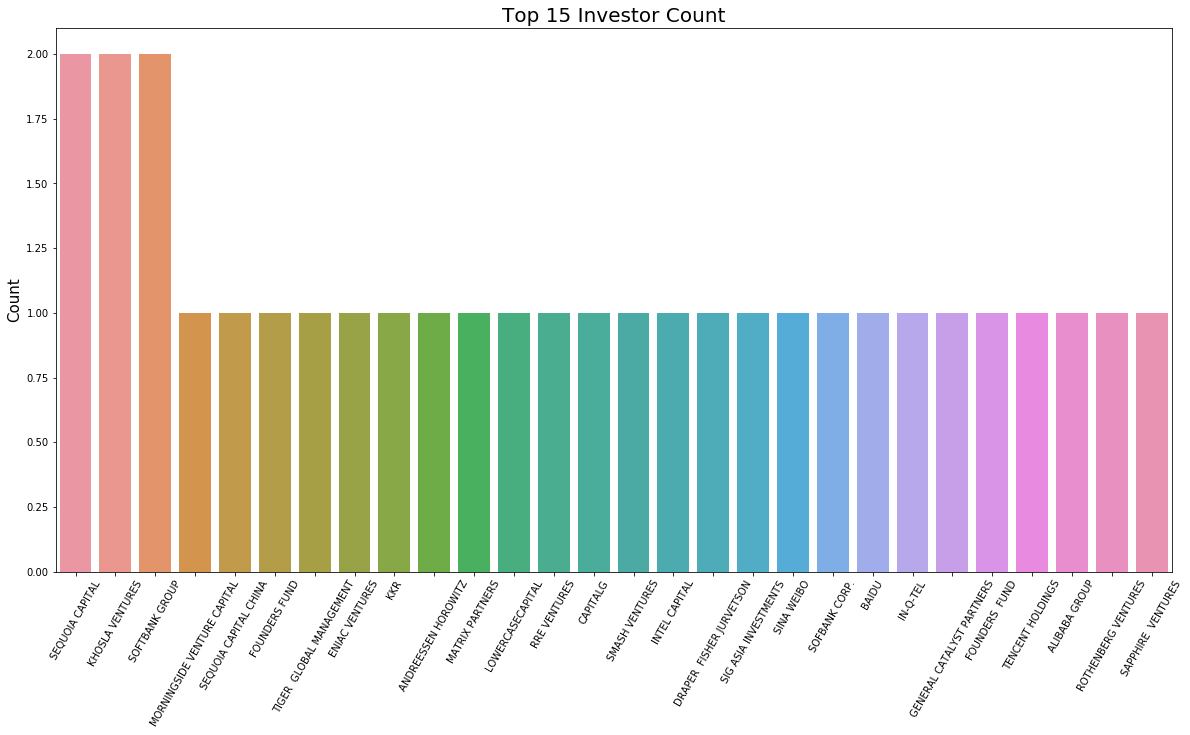

In [61]:
plt.figure(figsize = (20,10))

g = sns.barplot(x=count.index ,y=count.values)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_title("Top 15 Investor Count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

**Nhận xét 1** (dựa vào biểu đồ thứ nhất)
Biểu đồ này chỉ biểu hiện dữ liệu các nhà đầu tư có nhiều hơn 10 unicorns.
- Sequoia Capital và Sequoia Capital China đến từ Trung Quốc đều thuộc một công ty mẹ, đứng đầu trong bảng các nhà đầu tư sở hữu nhiều unicorns nhất.
- Thứ 3 là SoftBank của Nhật bản.
- Thứ 4 là Tencent Holdings lại là một nhà đầu tư đến từ Trung Quốc.
- Các nhà đầu tư còn lại phần lớn đến từ Mỹ

Ta có một kết luận thú vị:
- Ở Nhật Bản và Trung Quốc, các quỹ đầu tư unicorns tập trung vào chỉ 1 số công ty lớn.
- Ở Mỹ số lượng nhà đầu tư nhiều, và trải đều.

**Nhận xét 2** (dựa vào biểu đồ thứ hai)
Biểu đồ này là các nhà đầu tư trong top 10 unicorns trên thế giới.
- Softbank có Softbank Group và Softbank Corp của Nhật Bản đều nằm trong top 10 nhà đầu tư chiếm cổ phần ở nhiều unicorns nhất.
- Sequoia Capital và Sequoia Capital China tương tự như Softbank
- Ngoài ra ta còn thấy các cái tên: Alibaba Group, Tecent Holdings đều là những cái tên đến từ Trung Quốc.
- Các cái tên còn lại phần lớn là các nhà đầu tư ở Mỹ.

### Sự xuất hiện của các unicorns theo từng năm. Năm nào bùng nổ nhất?

#### Tiền xử lý dữ liệu

- Từ dữ liệu thời gian, ta chỉ trích ra giá trị năm và đưa vào cột mới.

In [62]:
#unicorns_df['Month_year'] = unicorns_df['Date Joined'].dt.to_period("M")
unicorns_df['Year'] = unicorns_df['Date Joined'].dt.year

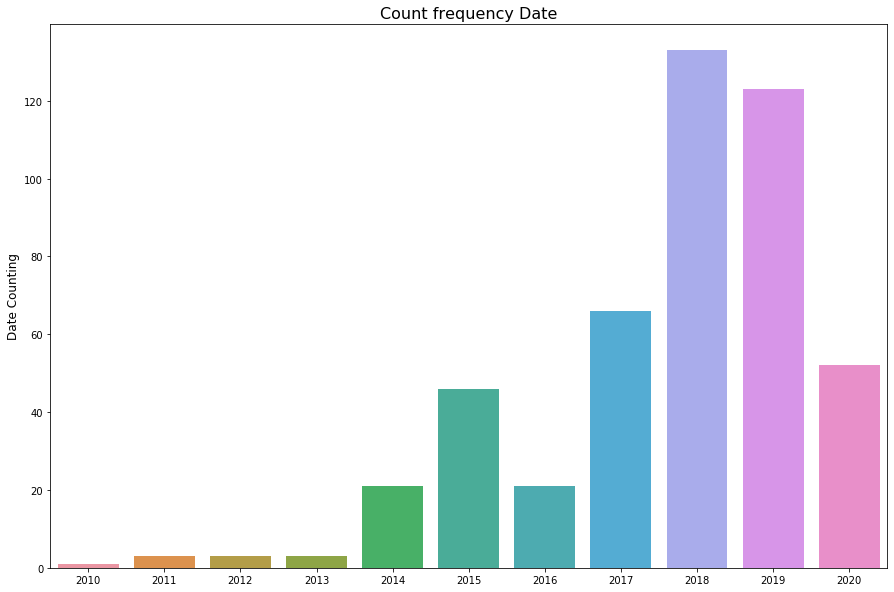

In [63]:
plt.figure(figsize=(15,10))

sns.countplot(x='Year', data=unicorns_df)
plt.xlabel('', fontsize=12)
plt.ylabel('Date Counting', fontsize=12)
plt.title("Count frequency Date", fontsize=16)

plt.show()

**Nhận xét**
- Năm 2018 và 2019 là năm nhiều start up được định giá là unicorns nhất.

### Thống kê một số unicorns ở Đông Nam Á

Theo như các phân tích trước, các quốc gia ở Đông Nam Á có unicorns là: Singapore, Indonesia, Philippines

In [64]:
unicorns_sea = unicorns_df[(unicorns_df['Country'] == 'Singapore') | 
            (unicorns_df['Country'] == 'Indonesia') | 
            (unicorns_df['Country'] == 'Philippines')]
unicorns_sea.groupby('Country')['Country'].agg('count')

Country
Indonesia      5
Philippines    1
Singapore      3
Name: Country, dtype: int64

In [65]:
unicorns_sea

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4,Valuation ($B) log,Year
12,12,Grab,14.3,2014-12-04,Singapore,Auto & transportation,"GGV Capital, Vertex Venture Holdings, Softbank...",GGV CAPITAL,VERTEX VENTURE HOLDINGS,SOFTBANK GROUP,None,2.727853,2014
23,23,Go-Jek,10.0,2016-08-04,Indonesia,"Supply chain, logistics, & delivery","Formation Group, Sequoia Capital India, Warbur...",FORMATION GROUP,SEQUOIA CAPITAL INDIA,WARBURG PINCUS,None,2.397895,2016
35,35,Tokopedia,7.0,2018-12-12,Indonesia,E-commerce & direct-to-consumer,"Softbank Group, Alibaba Group, Sequoia Capital...",SOFTBANK GROUP,ALIBABA GROUP,SEQUOIA CAPITAL INDIA,None,2.079442,2018
87,87,HyalRoute,3.5,2020-05-26,Singapore,Mobile & telecommunications,Kuang-Chi,KUANG-CHI,None,None,None,1.504077,2020
106,106,Traveloka,3.0,2017-07-28,Indonesia,Travel,"Global Founders Capital, East Ventures, Expedi...",GLOBAL FOUNDERS CAPITAL,EAST VENTURES,EXPEDIA INC.,None,1.386294,2017
112,112,OVO,2.9,2019-03-14,Indonesia,Fintech,"Grab, Tokopedia, Tokyo Century Corporation",GRAB,TOKOPEDIA,TOKYO CENTURY CORPORATION,None,1.360977,2019
130,130,Bukalapak,2.5,2017-11-16,Indonesia,E-commerce & direct-to-consumer,"500 Startups, Batavia Incubator, Emtek Group",500 STARTUPS,BATAVIA INCUBATOR,EMTEK GROUP,None,1.252763,2017
255,255,Trax,1.3,2019-07-22,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",HOPU INVESTMENT MANAGEMENT,BOYU CAPITAL,DC THOMSON VENTURES,None,0.832909,2019
362,362,Revolution Precrafted,1.0,2017-10-23,Philippines,Other,"K2 Global, 500 Startups",K2 GLOBAL,500 STARTUPS,None,None,0.693147,2017


In [66]:
unicorns_sea[unicorns_sea['Industry'] == 'E-commerce & direct-to-consumer']

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4,Valuation ($B) log,Year
35,35,Tokopedia,7.0,2018-12-12,Indonesia,E-commerce & direct-to-consumer,"Softbank Group, Alibaba Group, Sequoia Capital...",SOFTBANK GROUP,ALIBABA GROUP,SEQUOIA CAPITAL INDIA,None,2.079442,2018
130,130,Bukalapak,2.5,2017-11-16,Indonesia,E-commerce & direct-to-consumer,"500 Startups, Batavia Incubator, Emtek Group",500 STARTUPS,BATAVIA INCUBATOR,EMTEK GROUP,None,1.252763,2017


**Nhận xét**
- Indonesia có nhiều unicorns nhất Đông Nam Á.
- Theo thông tin ngoài lề, Sea Group (chủ quản Shopee) và Lazada đang có ý định thống trị thương mại điện tử ở Đông Nam Á nhưng vẫn chưa được định giá công ty tỉ đô. 
- 2 unicorn về thương mại điện tử của Indonesia được định giá lên tới 2.5 và 7 tỉ đô nên có vẻ Sea Group thất thế trước 2 unicorn này ở Indonesia.
- Grab và Go-Jek ghi tên vào 2 unicorn có giá trị nhất ở Đông Nam Á.

### 2.3.2 Dữ liệu start up ở Ấn Độ

**Dữ liệu start up ở Ấn Độ**
- Các lĩnh vực có nhiều start up nhất ở Ấn Độ có đi theo xu hướng của các unicorns trên thế giới hay không?
- Các SubVertical của top 3 Industry Vertical được phân bố như thế nào?
- Phân phối lượng tiền được đầu tư ở Ấn Độ.
- Các start up nhận được nhiều vòng đầu tư nhất ở Ấn Độ.
- Dữ liệu thời gian: số tiền đầu tư phân bố thế nào theo thời gian.

### Các lĩnh vực có nhiều start up nhất ở Ấn Độ có đi theo xu hướng của các unicorns trên thế giới hay không?

In [67]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [68]:
industry = startup_df['Industry Vertical'].value_counts()
industry

Consumer Internet                  941
Technology                         478
eCommerce                          186
Healthcare                          70
Finance                             62
                                  ... 
Deep-Tech                            1
Real Estate Broker Platform App      1
Education Marketplace                1
Nightlife Discovery Mobile App       1
Video Games                          1
Name: Industry Vertical, Length: 821, dtype: int64

In [69]:
industry[industry.values >= 3]

Consumer Internet                941
Technology                       478
eCommerce                        186
Healthcare                        70
Finance                           62
ECommerce                         61
Logistics                         32
E-Commerce                        29
Education                         24
Food & Beverage                   23
Ed-Tech                           14
E-commerce                        12
FinTech                            9
IT                                 8
Ecommerce                          8
Fin-Tech                           6
Food and Beverage                  6
Real Estate                        6
Others                             6
Online Education Platform          5
Online Food Delivery               5
Logistics Tech                     5
Health and Wellness                5
Transportation                     4
Transport                          4
Food & Beverages                   3
Hyperlocal Handyman Services       3
E

**Tiền xử lý**

Dữ liệu cột Industry Vertical có quá nhiều giá trị categorical, ta thử liệt kê các Industry Vertical có số lượng startup lớn hơn 3 thì thấy được một số Industry Vertical không đồng bộ như: 
- FinTech và Fin-Tech.
- eCommerce, ECommerce, E-Commerce, E-commerce, Ecommerce, ecommerce. 
- Food & Beverage, Food and Beverage, Food and Beverages, Food & Beverages
- Transport và Transportation
- Information Technology và IT
- Ed-Tech và EdTech
- Logistics Tech và Logistics
Ta sẽ đồng bộ các giá trị này vì đây là những lĩnh vực được nhiều sự quan tâm.

In [70]:
# FinTech
startup_df = startup_df.replace('Fin-Tech','FinTech', regex=True)

# E-commerce
startup_df = startup_df.replace('eCommerce','E-commerce', regex=True)
startup_df = startup_df.replace('ECommerce','E-commerce', regex=True)
startup_df = startup_df.replace('E-Commerce','E-commerce', regex=True)
startup_df = startup_df.replace('E-commerce','E-commerce', regex=True)
startup_df = startup_df.replace('Ecommerce','E-commerce', regex=True)
startup_df = startup_df.replace('ecommerce','E-commerce', regex=True)

# Food & Beverage
startup_df = startup_df.replace('Food & Beverage','Food & Beverage', regex=True)
startup_df = startup_df.replace('Food and Beverage','Food & Beverage', regex=True)
startup_df = startup_df.replace('Food and Beverages','Food & Beverage', regex=True)
startup_df = startup_df.replace('Food & Beverages','Food & Beverage', regex=True)

# Transport
startup_df = startup_df.replace('Transportation','Transport', regex=True)
startup_df = startup_df.replace('Transport','Transport', regex=True)

# Information Technology
startup_df = startup_df.replace('IT','Information Technology', regex=True)

# Ed-Tech
startup_df = startup_df.replace('Ed-Tech','EdTech', regex=True)

# Logistics
startup_df = startup_df.replace('Logistics Tech','Logistics', regex=True)

In [71]:
industry = startup_df['Industry Vertical'].value_counts()
industry = industry[industry.values >= 4]

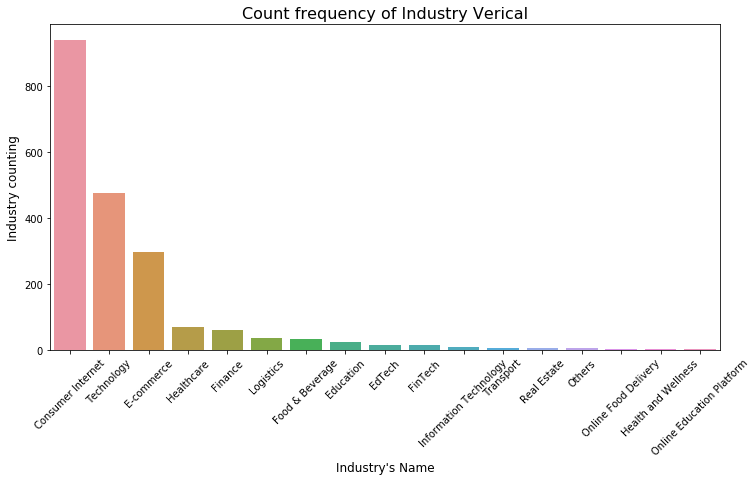

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(x=industry.index, y=industry.values)
plt.xticks(rotation=45)
plt.xlabel("Industry's Name", fontsize=12)
plt.ylabel('Industry counting', fontsize=12)
plt.title("Count frequency of Industry Verical", fontsize=16)
plt.show()

**Nhận xét**
3 lĩnh vực có nhiều start up nhất:
- Consumer Internet, Technology và E-commerce.
- Lĩnh vực FinTech và Finance đứng top đầu trong dữ liệu unicorns thì có vẻ rất ít start up.

### Các SubVertical được phân bố như thế nào?

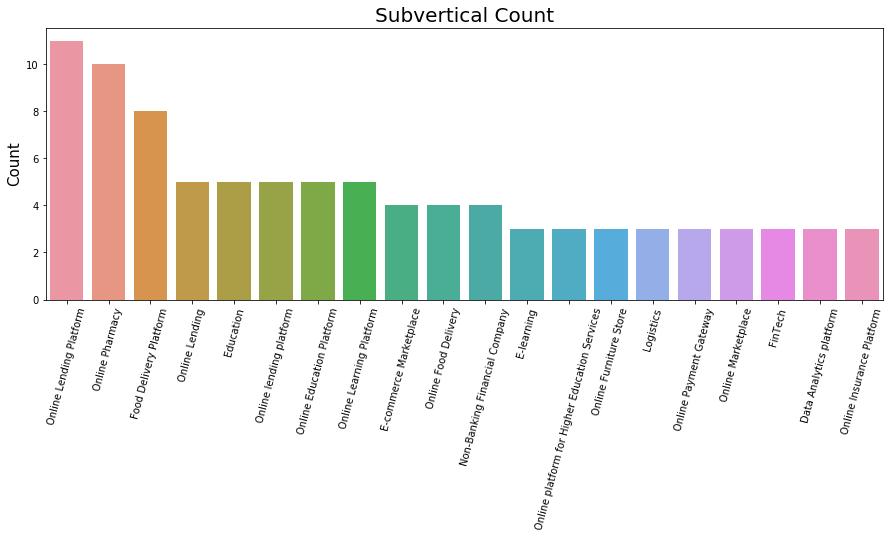

In [73]:
subvertical = startup_df['SubVertical'].value_counts()

plt.figure(figsize = (15,5))

g = sns.barplot(x=subvertical.index[:20],y=subvertical.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=75)
g.set_title("Subvertical Count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

### Các SubVertical của top 3 Industry Vertical được phân bố như thế nào?

### Technology

In [74]:
tech_sub = startup_df[startup_df['Industry Vertical'] == 'Technology']['SubVertical'].value_counts()
tech_sub

Education                                       3
Data Analytics platform                         3
Digital Payment Platform                        2
Information Technology                          2
Big Data Analytics Platform                     2
                                               ..
Online Hotel Reservation Platform               1
Health Technology platform                      1
Point-of-Sale services                          1
IoT Platform for Bus                            1
Cash Flow Management Solution for Businesses    1
Name: SubVertical, Length: 470, dtype: int64

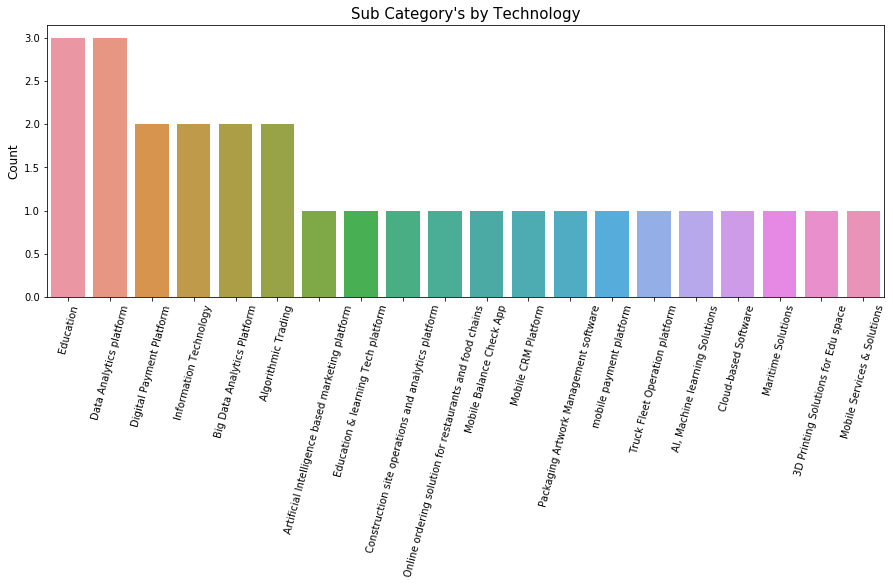

In [75]:
plt.figure(figsize = (15,5))
g = sns.barplot(x=tech_sub.index[:20],y=tech_sub.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=75)
g.set_title("Sub Category's by Technology", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

**Nhận xét**
- Data Analytics platform, Digital Payment, Education là các lĩnh vực cạnh tranh ở Ấn Độ.
- Trong khi đó IoT, AI, VR là những cái tên hot hiện nay chỉ có 1 start up trong số này. Lĩnh vực này không mang tính cạnh tranh cao ở Ấn Độ.

### Consumer Internet

In [76]:
cons_internet = startup_df[startup_df['Industry Vertical'] == 'Consumer Internet']['SubVertical'].value_counts()
cons_internet

Food Delivery Platform                               8
Online Learning Platform                             5
Online lending platform                              5
Online Lending Platform                              4
Online Insurance Platform                            3
                                                    ..
Mobile-First Video Blogging App                      1
Mobile-first Enterprise communication platform       1
Hyperlocal Discovery & Rewards platform              1
Fitness Centres, Gym Discovery online marketplace    1
Money Lending platform                               1
Name: SubVertical, Length: 874, dtype: int64

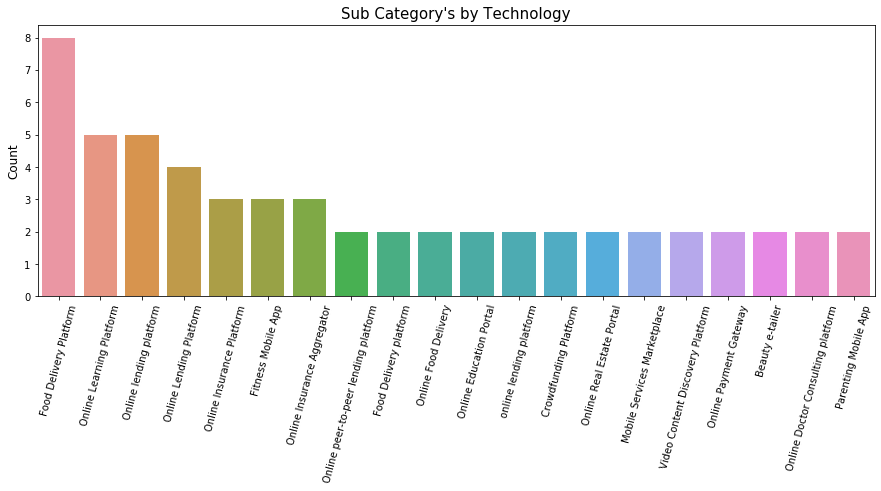

In [77]:
plt.figure(figsize = (15,5))
g = sns.barplot(x=cons_internet.index[:20],y=cons_internet.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=75)
g.set_title("Sub Category's by Technology", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

**Nhận xét**
- Food Delivery Platform là lĩnh vực cạnh tranh cao nhất ở Ấn Độ khi có tới 8 start up. Nếu quan sát thêm ta còn thấy Food Ordering Mobile App, Food Delivery platform (tên dữ liệu không đồng bộ).
- Đứng thứ 2 và 3 là Online lending platform và Online Learning Platform. Nếu quan sát thêm ta cũng thấy tên dữ liệu không đồng bộ ở 2 lĩnh vực này.

Có lẽ ta nên tiền xử lý thêm dữ liệu ở cột này. Nhưng vẫn không ảnh hưởng nhiều đến kết luận của chúng ta.

### E-commerce

In [78]:
ecommerce = startup_df[startup_df['Industry Vertical'] == 'E-commerce']['SubVertical'].value_counts()
ecommerce = ecommerce[ecommerce.values >= 2]
ecommerce

Online Pharmacy                                     7
E-commerce Marketplace                              4
Online Gifting platform                             3
Online Furniture Store                              3
Mobile Wallet & E-commerce platform                 2
Online Women\\xe2\\x80\\x99s Fashion Marketplace    2
Online fashion rental platform                      2
Online marketplace                                  2
Retail                                              2
Used Furniture & Appliances Marketplace             2
Fashion Apparel eTailer                             2
Online Marketplace                                  2
Online Grocery Store                                2
E-commerce SAAS Solutions                           2
Medical Supplies eTailer                            2
B2B Marketplace                                     2
Fashion eTailer                                     2
Online fashion marketplace                          2
Social Commerce             

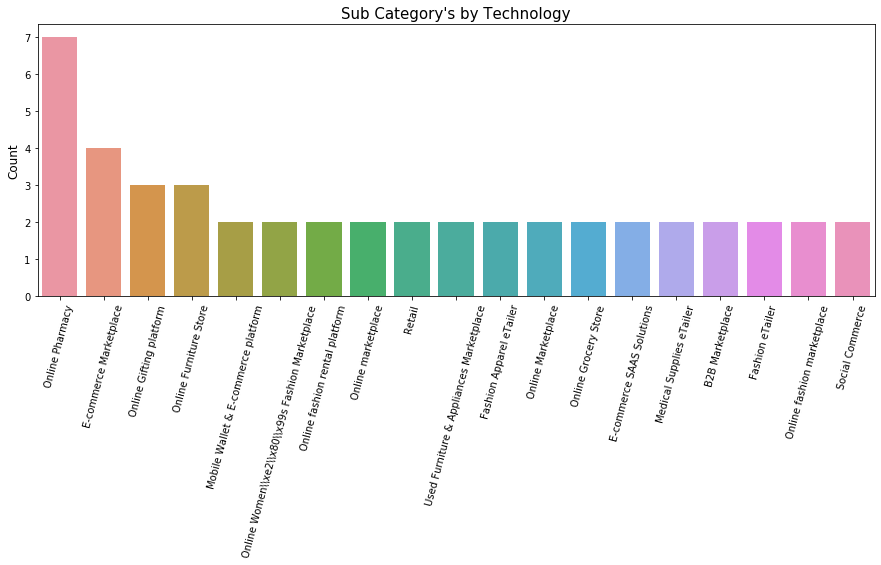

In [79]:
plt.figure(figsize = (15,5))
g = sns.barplot(x=ecommerce.index,y=ecommerce.values)
g.set_xticklabels(g.get_xticklabels(),rotation=75)
g.set_title("Sub Category's by Technology", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

**Nhận xét**
- Nền tảng nhà thuốc online và chợ thương mại điện tử là 2 lĩnh vực có nhiều start up nhất ở Ấn Độ.
- Ngoài ra nếu quan sát kĩ ta sẽ thấy keyword "Fashion" xuất hiện khá nhiều, đây cũng là lĩnh vực mang tính cạnh tranh cao.
- Đứng sau là lĩnh vực Furniture, nội thất online.

### Phân phối số tiền được đầu tư ở Ấn Độ.

**Tiền xử lý**
- Tiền xử lý cột Amount in USD có một chút phức tạp.
- Xem phần tiền xử lý cột Amount in USD ở phần 1 "Dữ liệu start up Ấn Độ -> tiền xử lý -> cột Amount in USD"

In [80]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transport,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


#### Ta tìm hiểu về cột Amount in USD (sô vốn đầu tư các vòng của các start up) trên các tiêu chí: thấp nhất, cao nhất, trung vị, độ lệch chuẩn, và tổng tiền đã đầu tư.

In [81]:
print("Min Amount")
print(startup_df["Amount in USD"].min())
print("Max Amount")
print(startup_df["Amount in USD"].max())
print("Mean Amount")
print(round(startup_df["Amount in USD"].mean(),2))
print("Median Amount")
print(startup_df["Amount in USD"].median())
print("Standard Deviation Amount")
print(round(startup_df["Amount in USD"].std(),2))
print("Sum of Amount in USD")
print(round(startup_df["Amount in USD"].sum()))

Min Amount
16000.0
Max Amount
3900000000.0
Mean Amount
18400344.85
Median Amount
1750000.0
Standard Deviation Amount
121140713.4
Sum of Amount in USD
38143914864.0


#### Dữ liệu đầu tư tính trong khoảng thời gian nào?

In [82]:
print(startup_df['Date dd/mm/yyyy'].describe().loc['first'])
print(startup_df['Date dd/mm/yyyy'].describe().loc['last'])

2015-01-05 00:00:00
2020-10-01 00:00:00


In [83]:
startup_df[startup_df['Amount in USD'] == startup_df["Amount in USD"].max()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
60,61,2019-08-27,Rapido Bike Taxi,Transport,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09


In [84]:
startup_df['Amount in USD log'] = np.log(startup_df["Amount in USD"] + 1)

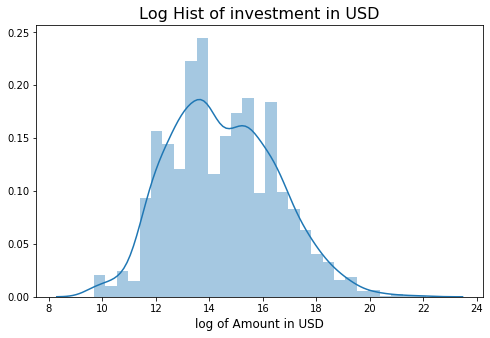

In [85]:
plt.figure(figsize=(8,5))
sns.distplot(startup_df['Amount in USD log'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log Hist of investment in USD", fontsize=16)
plt.show()

**Nhận xét**
- Mức đầu tư thấp nhất của một start up ở Ấn Độ là 16.000\$
- Mức đầu tư cap nhất của một start up ở Ấn Độ là 3.9 tỉ $. Đó là Rapido Bike Taxi, nằm trong lĩnh vực vận chuyển công nghệ. Ở Đông Nam Á có Grab đã trở thành Unicorn, thế giới có Uber, và với Trung Quốc là Didi Chuxing (top 2 định giá unicorn) đều là các unicorn của thế giới trong lĩnh vực này. Với thị trường tỉ dân tương tự như Trung Quốc thì Rapido Bike Taxi có khả năng sẽ trở thành unicorn của thế giới.
- Mức đầu tư trung bình của một start up là 18 triệu đô, mức đầu tư trung vị là 1.75 triệu đô.
- Có vẻ như số tiền gọi vốn của các start up ở Shark Tank Việt Nam vẫn còn quá thấp so với mức trung vị của Ấn Độ. Chúng ta không có dữ liệu vốn đầu tư của tất cả start up ở Việt Nam nên không thể kết luận nhiều hơn ở phần này.
- Tổng nguồn vốn đầu tư vào Ấn Độ tính từ 1/5/2015 đến 10/1/2020 là 38 tỉ \$

**Nhận xét dựa vào đồ thị**

- Dựa vào biểu đồ ta thấy nguồn vốn đầu tư vào Ấn Độ nằm ở giữa có phân phối không ổn định, nó phản ánh mức độ rủi ro trong đầu tư vào các công ty gọi vốn ở mức này cao. Càng về cuối biểu đồ (từ giá trị ln 16 trở đi), đường đồ thị càng trở nên mượt hơn (smooth) nghĩa là các công ty đạt được vốn đầu tư ở những mức này là những công ty có tiềm năng phát triển cao. 

### Dữ liệu thời gian: số tiền đầu tư phân bố thế nào theo thời gian.

Chúng ta đã tiền xử lý dữ liệu thời gian ở phần trước, bây giờ chúng ta chỉ đi sâu vào phân tích dữ liệu.

**Tiền xử lý**
- Vì dữ liệu thời gian là ngày/tháng/năm. Nếu ta vẽ biểu đồ với đơn vị ngày sẽ khó quan sát được. Nên ta sẽ gom vào tháng/năm và năm để có cái nhìn trực quan hơn.

In [86]:
startup_df['Month_year'] = startup_df['Date dd/mm/yyyy'].dt.to_period("M")
startup_df['Year'] = startup_df['Date dd/mm/yyyy'].dt.to_period("A")

In [87]:
startup_df = startup_df.sort_values(by='Month_year')

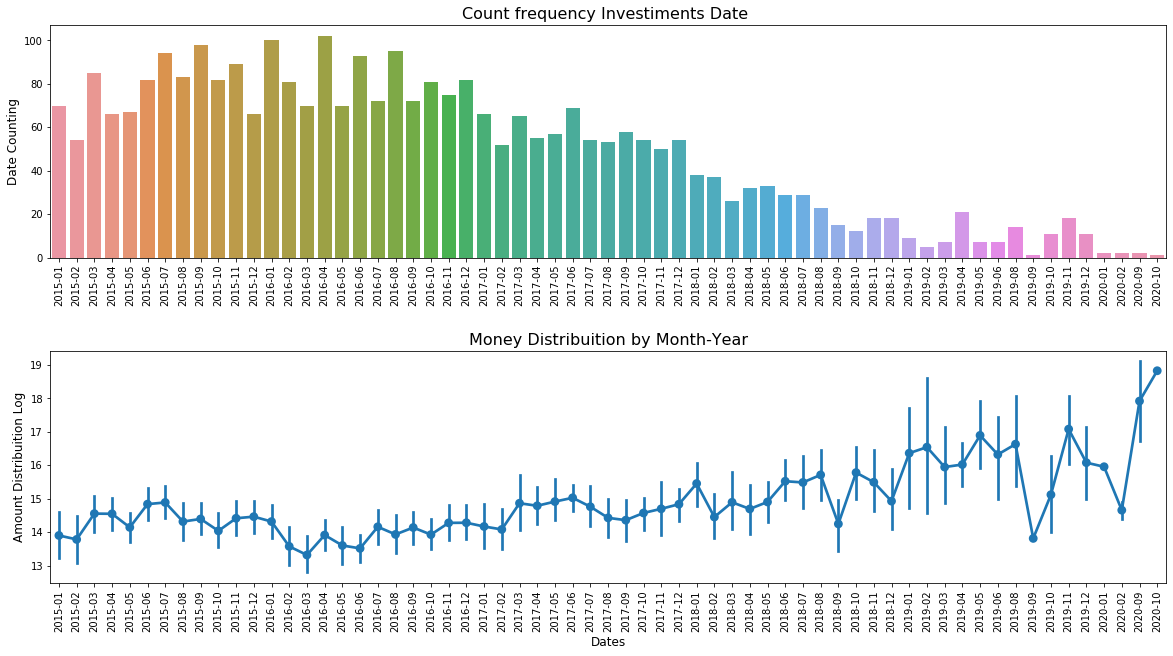

In [88]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.countplot(x='Month_year', data=startup_df)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=12)
plt.ylabel('Date Counting', fontsize=12)
plt.title("Count frequency Investiments Date ", fontsize=16)

plt.subplot(212)
sns.pointplot(x='Month_year', y='Amount in USD log', data=startup_df)
plt.xticks(rotation=90)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Amount Distribuition Log', fontsize=12)
plt.title("Money Distribuition by Month-Year", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

**Nhận xét**
Quan sát biểu đồ ta nhận ra ngay 2 điều thú vị:
- Số vòng gọi vốn thành công giảm dần theo thời gian.
- Số vốn đầu tư tăng dần theo thời gian.

Điều đó có ý nghĩa gì?
- 2015 - 2017 là thời điểm bùng nổ của các start up nên số vòng gọi vốn nhiều và vốn đầu tư ban đầu cũng được thể hiện ở mức thấp.
- 2018 là thời điểm "thanh lọc start up". Các start up có tiềm năng sẽ bước vào giai đoạn tiếp theo để phát triển nên số vòng gọi vốn giảm và số tiền đầu tư được tăng.
- 2019 - 2020 là thời điểm các start up có tiềm năng bước vào giai đoạn phát triển nhất. Số vòng gọi vốn giảm nhưng số tiền của các vòng gọi vốn lại rất cao.

Chúng ta sẽ tìm hiểu những start up tiềm năng ở Ấn Độ ở phần sau.

### Các start up nhận được nhiều vòng đầu tư nhất ở Ấn Độ.

Chúng ta sẽ liệt kê những start up nhận được nhiều hơn 5 vòng đầu tư ở Ấn Độ và vẽ biểu đồ cột để thể hiện điều đó.

In [89]:
print("Total startups funded : ", len(startup_df["Startup Name"].unique()))
print(startup_df["Startup Name"].value_counts())

Total startups funded :  2457
Ola Cabs             8
Swiggy               8
Paytm                7
Meesho               6
Medinfi              6
                    ..
Teewe                1
Hello Curry          1
MyDermacy            1
Juggernaut           1
Purple Style Labs    1
Name: Startup Name, Length: 2457, dtype: int64


In [90]:
startup_name = startup_df['Startup Name'].value_counts()
startup_name = startup_name[startup_name.values >= 5]
startup_name

Ola Cabs         8
Swiggy           8
Paytm            7
Meesho           6
Medinfi          6
NoBroker         6
Nykaa            6
UrbanClap        6
Flipkart         5
Grofers          5
Capital Float    5
Moglix           5
Toppr            5
Jugnoo           5
Uniphore         5
Name: Startup Name, dtype: int64

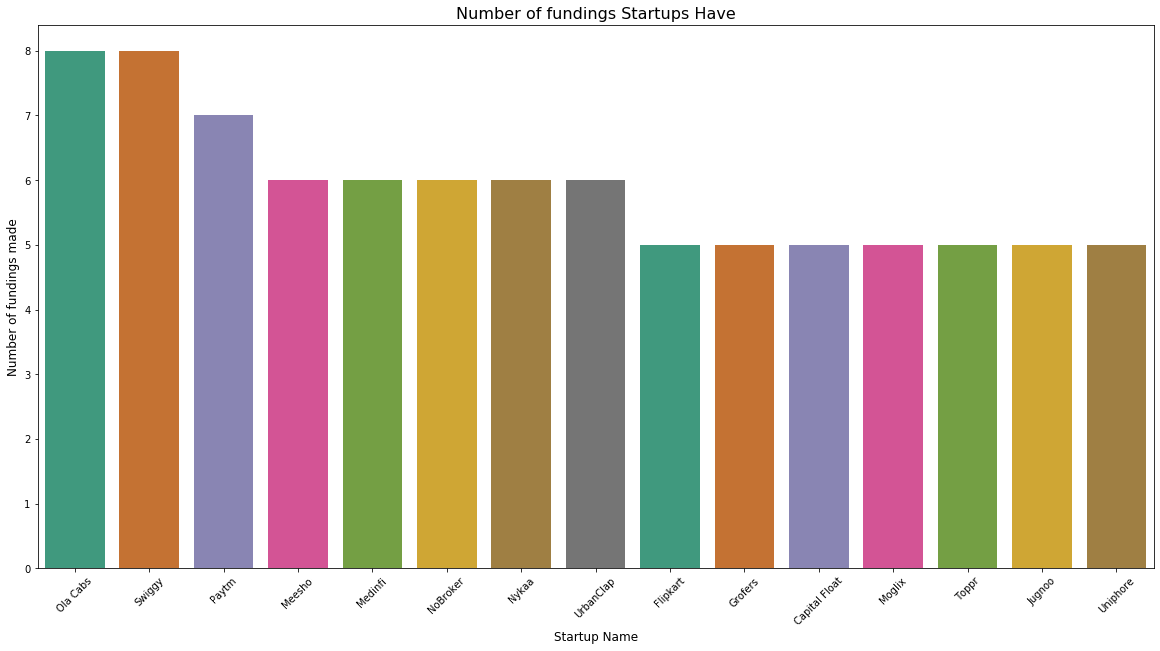

In [91]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(y = startup_name.values, x = startup_name.index, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation=45)
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

**Các start up này có mặt trong danh sách dữ liệu unicorn đã phân tích lúc trước không nhỉ?**

In [92]:
unicorns_df[unicorns_df['Country'] == 'India']['Company']

8       One97 Communications
21                    BYJU'S
25                 Oyo Rooms
34                  Snapdeal
41                  Ola Cabs
92                    Swiggy
138                    Udaan
149                   Zomato
153              ReNew Power
183                 BillDesk
208                Pine Labs
211                Delhivery
225             PolicyBazaar
239                     Hike
278                 FirstCry
326                 Lenskart
329                   InMobi
397                  Dream11
400                BigBasket
413    Ola Electric Mobility
414                   Rivigo
Name: Company, dtype: object

In [93]:
# Danh sách các công ty unicorn ở Ấn Độ
unicorns_india = unicorns_df[unicorns_df['Country'] == 'India']['Company'].to_list()

In [94]:
print("The number of unicorns in India", len(unicorns_india))
print("The number of start up has large 5 round in India", startup_name.shape[0])

The number of unicorns in India 21
The number of start up has large 5 round in India 15


In [95]:
set(startup_name.index)

{'Capital Float',
 'Flipkart',
 'Grofers',
 'Jugnoo',
 'Medinfi',
 'Meesho',
 'Moglix',
 'NoBroker',
 'Nykaa',
 'Ola Cabs',
 'Paytm',
 'Swiggy',
 'Toppr',
 'Uniphore',
 'UrbanClap'}

In [96]:
list(set(unicorns_india) & set(startup_name.index))

['Ola Cabs', 'Swiggy']

**Nhận xét**
- Có 2 start up trong số các start up trên 5 vòng gọi vốn thành công là trở thành unicorn là Swiggy và Ola Cabs.
- Có thể có thêm vài start up khác nữa vì dữ liệu cột Startup Name có thể không đồng bộ với nhau. Nhưng điều đó không ảnh hưởng nhiều lắm về quan sát và kết luận của chúng ta.

Vậy các start up có ít hơn 5 vòng gọi vỗn nhưng vẫn là unicorns thì sao? Thử xem nhé!

In [97]:
startup_df[startup_df['Startup Name'].isin(unicorns_india)]['Startup Name'].value_counts()

Swiggy          8
Ola Cabs        8
Zomato          4
Udaan           4
Rivigo          4
BigBasket       4
PolicyBazaar    3
Lenskart        3
Delhivery       3
FirstCry        2
Oyo Rooms       2
Snapdeal        2
Dream11         1
Hike            1
BillDesk        1
Pine Labs       1
Name: Startup Name, dtype: int64

Có vẻ là dữ liệu tên start up của 2 tập dữ liệu cũng không đồng bộ với nhau. Ta thử kiểm tra một vài cái tên xem thế nào!

In [98]:
startup_df[startup_df['Startup Name'].str.contains("Oyo", na=False)]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Amount in USD log,Month_year,Year
2476,2477,2015-03-08,Oyorooms,Budget Hotel accommodation brand,NaN,New Delhi,"SoftBank Group, Greenoaks Capital, Sequoia Cap...",Private Equity,100000000.0,18.420681,2015-03,2015
2618,2619,2015-07-15,Oyo Rooms,Budget Hotel Accommodation,NaN,Gurgaon,"Softbank, Sequoia Capital",Private Equity,100000000.0,18.420681,2015-07,2015
1446,1447,2016-08-16,OyoRooms,Consumer Internet,Budget Hotels Aggregator,New Delhi,SoftBank Group,Private Equity,62000000.0,17.942645,2016-08,2016
1760,1761,2016-11-04,Oyo,Consumer Internet,Online Branded Budget Room Booking Service,New Delhi,"Softbank, Sequoia Capital, Lightspeed Venture ...",Private Equity,100000000.0,18.420681,2016-11,2016
906,907,2017-04-24,Oyo Rooms,Consumer Internet,Branded Budget Hotels Aggregator,Gurgaon,"SoftBank Vision Fund, Lightspeed Venture Partn...",Private Equity,250000000.0,19.336971,2017-04,2017
115,116,2018-02-14,OyoRooms,Hospitality,Budget Rooms,Gurgaon,DiDi Chuxing,Equity,100000000.0,18.420681,2018-02,2018


In [99]:
startup_df[startup_df['Startup Name'] == "BYJU’S"]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Amount in USD log,Month_year,Year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,19.113828,2020-09,2020


In [100]:
unicorns_df[unicorns_df['Company'] == "BYJU'S"]

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4,Valuation ($B) log,Year
21,21,BYJU'S,10.5,2017-07-25,India,Edtech,"Tencent Holdings, Lightspeed India Partners, S...",TENCENT HOLDINGS,LIGHTSPEED INDIA PARTNERS,SEQUOIA CAPITAL INDIA,None,2.442347,2017


**Nhận xét**

- Vậy là dữ liệu cột **Startup Name** trong dữ liệu start up Ấn Độ không đồng bộ với nhau. Đáng lẽ với **"Oyo Rooms"** chúng ta có tới 5 vòng gọi vốn thành công và cũng nằm trong danh sách unicorns. 

- Và dữ liệu cột **Startup Name** trong dữ liệu start up Ấn Độ với **Company** trong bảng unicorns cũng không đồng bộ với nhau. Chẳng hạn **BYJU'S** nằm trong cả 2 cột của 2 bảng dữ liệu nhưng đoạn code trên không liệt kê ra. 

Có lẽ sẽ mất một chút thời gian để tiền xử lý phần này, nhưng nhìn chung nó vẫn không ảnh hưởng lắm đến kết luận của chúng ta.

**Nhận xét**
- Rivigo, Udaan, Zomato, BigBasket, PolicyBazaar, Delhivery, Lenskart, Oyo Rooms, Snapdeal, FirstCry... Có rất nhiều start up trở thành unicorn chỉ qua 1 ~ 4 lần gọi vốn.
- Trong khi đó chỉ có 3 start up (tính thêm Oyo Rooms) là các unicorn có nhiều hơn 5 lần gọi vốn thành công để phát triển.

**BYJU'S** đã trở thành unicorn vào 25/7/2017 và có một vòng gọi vốn thành công sẽ thực hiện vào 9/2020. Có vẻ đúng với kết luận trước của chúng ta. Những công ty có số tiền gọi vốn cao ở phía sau đồ thị phân phối vốn đầu tư thì càng có tiềm năng.

## 2.4 Kết luận chung

### Lĩnh vực nào có tính cạnh tranh cao nhất hiện nay? Lĩnh vực nào có tính cạnh tranh còn thấp? 
Với cách mạng công nghiệp 4.0 hiện nay các lĩnh vực đã phát triển mạnh trên thế giới là:
- FinTech
- Internet Software & Services
- E-commerce
- AI
- Transportation

Về FinTech, Transportation và E-commerce tại châu Á và cụ thể là Đông Nam Á đang là những lĩnh vực có tính cạnh tranh khốc liệt nhất và nhiều start up nhất chẳng hạn:
- Grab của Singapore và Go-Jek của Indonesia là 2 unicorns có định giá không quá xa nhau.
- E-commerce ở Đông Nam Á có: Lazada và Shopee được đầu tư từ 2 nhà đầu tư lớn là Alibaba và SoftBank.

Các lĩnh vực hot nhưng tính cạnh tranh còn thấp có thể kể đến ở châu Á cụ thể Đông Nam Á là:
- Hardware
- IoT
- Education (E-Learning)
- AI
- CyberSecurity

Riêng lĩnh vực AI Trung Quốc cũng sở hữu nhiều unicorns lớn mạnh nhất thế giới (ByteDance công ty mẹ của TikTok) còn nhìn chung ở châu Á, cụ thể là Ấn Độ vẫn còn ít start up được đầu tư phát triển mạnh. Cũng có thể trong các lĩnh vực này, châu Á khó bắt kịp với các nước như Mỹ, Đức... nên có ít start up. Mỹ sở hữu nhiều unicorns nhất trên thế giới trên mọi lĩnh vực

***Điều đó ảnh hưởng như thế nào tới việc lựa chọn lĩnh vực để thành lập start up dựa trên các tiêu chí: vốn đầu tư, ý tưởng, xu hướng?***

- Vốn đầu tư thấp nhất của một start up ở Ấn Độ là 16000\$
- Vốn đầu tư để một start up cần để phát triển là khoảng 1.75 triệu \$
- Vốn đầu tư trung bình mà một start up có tiềm năng là khoảng 38 triệu \$
- Nếu không tính đến các lĩnh vực cạnh tranh cao (FinTech, E-commerce, Transportation, Internet Software & Services) thì xu hướng các start up của thế giới là AI, Hardware, IoT, CyberSecurity, Education (E-learning) và cụ thể ở Ấn Độ ta có thể thấy các start up E-learning đã xuất hiện rất nhiều.
- Theo biểu đồ các vòng đầu tư ở Ấn Độ theo thời gian thì 3 năm là con số để một start up khẳng định tiềm năng của mình.

# 3. Nhìn lại quá trình làm đồ án

## 3.1 Khó khăn

Khó khăn ban đầu là tìm được tập dữ liệu có ý nghĩa thực tế để phân tích. Với chủ đề start up và unicorns. May mắn là có một tập data set về unicorns của CB-Insights của Kaggle [ở đây](https://www.kaggle.com/narmelan/global-unicorns-2019) và tập dữ liệu start up ở Ấn Độ để có thể đi cụ thể hơn vào một quốc gia có nền CNTT phát triển.

Nhưng tập dữ liệu unicorns ở đây chỉ thu thập tới 1/2020, tức là dữ liệu đã cũ. Để tìm tập dữ liệu mới ta phải lên CB-Insights để crawl bảng dữ liệu mới nhất về (Vì tập dữ liệu chỉ gửi cho những người có email doanh nghiệp).

Việc tiền xử lý 2 tập dữ liệu này cũng gặp nhiều khó khăn khi tên của các giá trị không đồng bộ trong cùng một cột. Nhưng trong quá trình phân tích đã phát hiện và kịp thời chỉnh sửa để có kết quả tốt hơn.

## 3.2 Những vấn đề học được

- Quy trình tìm kiếm và phân tích dữ liệu.
- Cách crawl dữ liệu HTML từ một website.
- Các kĩ thuật xử lý, tính toán dữ liệu. Chẳng hạn như tách chuỗi giá trị được phân cách bằng dấu "," ra để điền vào các cột mới cho phù hợp với việc phân tích (tiền xử lý cột Select Investors của dữ liệu Unicorns) và tính value_counts trên nhiều cột cùng lúc sử dụng hàm squeeze và ravel.
- Cách vẽ đồ thị đệp từ Kaggle.
- Đưa dữ liệu numerical có khoảng cách rộng về dưới dạng hàm log để có đồ thị trực quan hơn.
- Các thông tin về các start up, thông tin và xu hướng của thế giới.
- Quy mô các start up ở một nước có nền công nghệ phát triển như Ấn Độ.

## 3.3 Những việc sẽ làm trong tương lai nếu có thời gian gian

**Dữ liệu investor** (file funds.csv)

Dữ liệu này chứa thông tin của 500.000 nhà đầu tư trên thế giới. Nếu phân tích được dữ liệu này ta sẽ có thêm kiến thức để chọn nhà đầu tư nếu có ý định làm start up.

- Liệt kê được các nhà đầu tư tiềm năng trong các lĩnh vực.
- Phân bố số lượng các nhà đầu tư ở các quốc gia.

**Dữ liệu unicorns**
- Khi dùng dữ liệu unicorn ở CB-Insights được thu thập đến 1/2020 và 8/2020 ta phát hiện ra được một điều thú vị về unicorn JUUU Labs và ByteDance.

In [101]:
unicorns_old_df = pd.read_csv('CB-Insights_Global-Unicorns_2019.csv')
unicorns_old_df.head()

,Company,Valuation ($B),Date Joined,Country,Category,Select Investors
0,Toutiao (Bytedance),$75.00,4/7/2017,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,Didi Chuxing,$56.00,12/31/2014,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Soft..."
2,JUUL Labs,$50.00,12/20/2017,United States,Consumer & retail,Tiger Global Management
3,SpaceX,$33.30,12/1/2012,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
4,Stripe,$35.25,1/23/2014,United States,Fintech,"Khosla Ventures, Lowercase Capital, capitalG"


In [102]:
unicorns_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4,Valuation ($B) log,Year
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP,4.948760,2017
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof...",MATRIX PARTNERS,TIGER GLOBAL MANAGEMENT,SOFBANK CORP.,None,4.043051,2014
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe...",FOUNDERS FUND,DRAPER FISHER JURVETSON,ROTHENBERG VENTURES,None,3.850148,2012
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None,3.610918,2014
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel",RRE VENTURES,FOUNDERS FUND,IN-Q-TEL,None,3.044522,2011


In [103]:
unicorns_df[unicorns_df['Company'] == 'JUUL Labs']

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4,Valuation ($B) log,Year
15,15,JUUL Labs,12.0,2017-12-20,United States,Consumer & retail,Tiger Global Management,TIGER GLOBAL MANAGEMENT,None,None,None,2.564949,2017


**Điều gì đã xảy ra với JUUL Labs và ByteDance?**

- Chỉ trong vòng nửa năm định giá công ty đã giảm từ 50 tỉ xuống còn chỉ 12 tỉ. Vậy có unicorn nào cũng bị giảm như thế trong tập 2 dữ liệu không ?
- Ngược lại giá trị của ByteDance lại tăng gấp đôi chỉ trong vòng nửa năm từ 75 lên 140. Đây có phải là do sự phát triển chóng mặt của Tiktok? 

**Liệu có phải do đại dịch Covid?**
- Có thể giải thích rằng đối với lĩnh vực Consumer & retail thì do đại dịch Covid, JUUL Labs đã bị mất đi một lượng lớn giá trị công ty đến chóng mặt chỉ trong vòng nửa năm.
- Ở chiều ngược lại với ứng dụng Tiktok thì nhờ có đại dịch Covid lượng người dùng Tiktok đã tăng cao khi ở nhà.

Nếu có thời gian chúng ta sẽ liệt kê nhóm những lĩnh vực bị ảnh hưởng bởi Covid và không bị ảnh hưởng bởi Covid để so sánh 2 tập dữ liệu này để có những kết luận thú vị.

# 4. Reference
Các notebook phân tích dữ liệu start up ở Ấn Độ:

1. https://www.kaggle.com/shishir349/analyzing-th-growth-of-indian-startups

2. https://www.kaggle.com/kabure/indian-startups-python-explorations

3. https://www.kaggle.com/codename007/top-funding-startups-in-india
